In [ ]:
# Import necessary libraries
import numpy as np  # Used for numerical operations
import pandas as pd  # Used for data manipulation and analysis
from matplotlib import pyplot as plt
from math import sqrt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score  # Metrics to evaluate model performance
from sklearn.tree import DecisionTreeClassifier  # Decision Tree model
from sklearn.linear_model import LogisticRegression  # Logistic Regression model
from sklearn.ensemble import RandomForestClassifier  # Random Forest model
from sklearn.model_selection import train_test_split  # Function to split data into training and validation sets
from google.colab import drive  # Import Google Drive module



In [ ]:
#Mount Google Drive
drive.mount('/content/drive')  # Mount Google Drive to access files
#link to make a googdrive copy of the file or download it https://drive.google.com/file/d/1Jq2OogbpOqDOumwcIWDj4BTLB6fsSBTE/view?usp=sharing
#

Mounted at /content/drive


In [ ]:
# Load the dataset from Google Drive
file_path = '/content/drive/My Drive/Data Science Unilag/CarPrice_Assignment.csv'  # Path to the dataset
raw_data = pd.read_csv(file_path)  # Read the CSV file into a pandas DataFrame
#raw_data = pd.read_csv("CarPrice_Assignment.csv")  # Read the CSV file into a pandas DataFrame


In [ ]:
# print the shape
print(raw_data.shape)



(205, 26)


In [ ]:
#runs the first 5 rows
raw_data.head(5)

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

# Data Preprocessing

## Explonatory Data Aanalysis

In [ ]:
# Investigate all the elements whithin each Feature

for column in raw_data:
    unique_vals = np.unique(raw_data[column])
    nr_values = len(unique_vals)
    if nr_values < 10:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature car_ID :205
The number of values for feature symboling :6 -- [-2 -1  0  1  2  3]
The number of values for feature CarName :147
The number of values for feature fueltype :2 -- ['diesel' 'gas']
The number of values for feature aspiration :2 -- ['std' 'turbo']
The number of values for feature doornumber :2 -- ['four' 'two']
The number of values for feature carbody :5 -- ['convertible' 'hardtop' 'hatchback' 'sedan' 'wagon']
The number of values for feature drivewheel :3 -- ['4wd' 'fwd' 'rwd']
The number of values for feature enginelocation :2 -- ['front' 'rear']
The number of values for feature wheelbase :53
The number of values for feature carlength :75
The number of values for feature carwidth :44
The number of values for feature carheight :49
The number of values for feature curbweight :171
The number of values for feature enginetype :7 -- ['dohc' 'dohcv' 'l' 'ohc' 'ohcf' 'ohcv' 'rotor']
The number of values for feature cylindernumber :7 -- ['eight' 'fiv

## Checking for NULL Values

In [ ]:
# Checking for null values

raw_data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

### Ways of dealing with missing data
- Delete the whole observation
- Replace the NULL value with another value (mean, rolling mean, last day value, closest day value, mode, median, zero, etc)

In [ ]:
# manually creating a new column with null values
raw_data['price 2'] = raw_data['price']
raw_data['price 2'].iloc[0] = np.nan
raw_data['price 2'].iloc[1] = np.nan
raw_data['price 2'].iloc[2] = np.nan

raw_data.head(10)

<ipython-input-10-86f55c3518f6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['price 2'].iloc[0] = np.nan
<ipython-input-10-86f55c3518f6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['price 2'].iloc[1] = np.nan
<ipython-input-10-86f55c3518f6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['price 2'].iloc[2] = np.nan


car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   
5       6          2                  audi fox      gas        std        two   
6       7          1                audi 100ls      gas        std       four   
7       8          1                 audi 5000      gas        std       four   
8       9          1                 audi 4000      gas      turbo       four   
9      10          0       audi 5000s (diesel)      gas      turbo        two   

       carbody drivewheel enginelocation  wheelbase  ...  fuelsystem  \
0  convertible        rwd          front       88.6  ...        mpfi   
1  convertible        rwd          front       88.6  ...        mpfi   
2    hatchback        rwd          front       94.5  ...        mpfi   
3        sedan        fwd          front       99.8  ...        mpfi   
4        sedan        4wd          front       99.4  ...        mpfi   
5        sedan        fwd          front       99.8  ...        mpfi   
6        sedan        fwd          front      105.8  ...        mpfi   
7        wagon        fwd          front      105.8  ...        mpfi   
8        sedan        fwd          front      105.8  ...        mpfi   
9    hatchback        4wd          front       99.5  ...        mpfi   

   boreratio  stroke  compressionratio horsepower peakrpm  citympg highwaympg  \
0       3.47    2.68               9.0        111    5000       21         27   
1       3.47    2.68               9.0        111    5000       21         27   
2       2.68    3.47               9.0        154    5000       19         26   
3       3.19    3.40              10.0        102    5500       24         30   
4       3.19    3.40               8.0        115    5500       18         22   
5       3.19    3.40               8.5        110    5500       19         25   
6       3.19    3.40               8.5        110    5500       19         25   
7       3.19    3.40               8.5        110    5500       19         25   
8       3.13    3.40               8.3        140    5500       17         20   
9       3.13    3.40               7.0        160    5500       16         22   

       price    price 2  
0  13495.000        NaN  
1  16500.000        NaN  
2  16500.000        NaN  
3  13950.000  13950.000  
4  17450.000  17450.000  
5  15250.000  15250.000  
6  17710.000  17710.000  
7  18920.000  18920.000  
8  23875.000  23875.000  
9  17859.167  17859.167  

[10 rows x 27 columns]

In [ ]:
# updating with the mean
raw_data['price 2'][raw_data['price 2'].isna()] = raw_data['price 2'].mean()

raw_data.head(10)

<ipython-input-11-9930d6bd00f0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['price 2'][raw_data['price 2'].isna()] = raw_data['price 2'].mean()


car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   
5       6          2                  audi fox      gas        std        two   
6       7          1                audi 100ls      gas        std       four   
7       8          1                 audi 5000      gas        std       four   
8       9          1                 audi 4000      gas      turbo       four   
9      10          0       audi 5000s (diesel)      gas      turbo        two   

       carbody drivewheel enginelocation  wheelbase  ...  fuelsystem  \
0  convertible        rwd          front       88.6  ...        mpfi   
1  convertible        rwd          front       88.6  ...        mpfi   
2    hatchback        rwd          front       94.5  ...        mpfi   
3        sedan        fwd          front       99.8  ...        mpfi   
4        sedan        4wd          front       99.4  ...        mpfi   
5        sedan        fwd          front       99.8  ...        mpfi   
6        sedan        fwd          front      105.8  ...        mpfi   
7        wagon        fwd          front      105.8  ...        mpfi   
8        sedan        fwd          front      105.8  ...        mpfi   
9    hatchback        4wd          front       99.5  ...        mpfi   

   boreratio  stroke  compressionratio horsepower peakrpm  citympg highwaympg  \
0       3.47    2.68               9.0        111    5000       21         27   
1       3.47    2.68               9.0        111    5000       21         27   
2       2.68    3.47               9.0        154    5000       19         26   
3       3.19    3.40              10.0        102    5500       24         30   
4       3.19    3.40               8.0        115    5500       18         22   
5       3.19    3.40               8.5        110    5500       19         25   
6       3.19    3.40               8.5        110    5500       19         25   
7       3.19    3.40               8.5        110    5500       19         25   
8       3.13    3.40               8.3        140    5500       17         20   
9       3.13    3.40               7.0        160    5500       16         22   

       price       price 2  
0  13495.000  13243.716173  
1  16500.000  13243.716173  
2  16500.000  13243.716173  
3  13950.000  13950.000000  
4  17450.000  17450.000000  
5  15250.000  15250.000000  
6  17710.000  17710.000000  
7  18920.000  18920.000000  
8  23875.000  23875.000000  
9  17859.167  17859.167000  

[10 rows x 27 columns]

In [ ]:
# manually creating null values
raw_data['price 2'] = raw_data['price']
raw_data['price 2'].iloc[0] = np.nan
raw_data['price 2'].iloc[1] = np.nan
raw_data['price 2'].iloc[2] = np.nan

raw_data.head(10)

<ipython-input-12-cf0d20383e38>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['price 2'].iloc[0] = np.nan
<ipython-input-12-cf0d20383e38>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['price 2'].iloc[1] = np.nan
<ipython-input-12-cf0d20383e38>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data['price 2'].iloc[2] = np.nan


car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   
5       6          2                  audi fox      gas        std        two   
6       7          1                audi 100ls      gas        std       four   
7       8          1                 audi 5000      gas        std       four   
8       9          1                 audi 4000      gas      turbo       four   
9      10          0       audi 5000s (diesel)      gas      turbo        two   

       carbody drivewheel enginelocation  wheelbase  ...  fuelsystem  \
0  convertible        rwd          front       88.6  ...        mpfi   
1  convertible        rwd          front       88.6  ...        mpfi   
2    hatchback        rwd          front       94.5  ...        mpfi   
3        sedan        fwd          front       99.8  ...        mpfi   
4        sedan        4wd          front       99.4  ...        mpfi   
5        sedan        fwd          front       99.8  ...        mpfi   
6        sedan        fwd          front      105.8  ...        mpfi   
7        wagon        fwd          front      105.8  ...        mpfi   
8        sedan        fwd          front      105.8  ...        mpfi   
9    hatchback        4wd          front       99.5  ...        mpfi   

   boreratio  stroke  compressionratio horsepower peakrpm  citympg highwaympg  \
0       3.47    2.68               9.0        111    5000       21         27   
1       3.47    2.68               9.0        111    5000       21         27   
2       2.68    3.47               9.0        154    5000       19         26   
3       3.19    3.40              10.0        102    5500       24         30   
4       3.19    3.40               8.0        115    5500       18         22   
5       3.19    3.40               8.5        110    5500       19         25   
6       3.19    3.40               8.5        110    5500       19         25   
7       3.19    3.40               8.5        110    5500       19         25   
8       3.13    3.40               8.3        140    5500       17         20   
9       3.13    3.40               7.0        160    5500       16         22   

       price    price 2  
0  13495.000        NaN  
1  16500.000        NaN  
2  16500.000        NaN  
3  13950.000  13950.000  
4  17450.000  17450.000  
5  15250.000  15250.000  
6  17710.000  17710.000  
7  18920.000  18920.000  
8  23875.000  23875.000  
9  17859.167  17859.167  

[10 rows x 27 columns]

In [ ]:
# Deleting the NULL values
raw_data = raw_data.dropna(subset = ['price 2'])


In [ ]:
raw_data.head(10)

car_ID  symboling              CarName fueltype aspiration doornumber  \
3        4          2          audi 100 ls      gas        std       four   
4        5          2           audi 100ls      gas        std       four   
5        6          2             audi fox      gas        std        two   
6        7          1           audi 100ls      gas        std       four   
7        8          1            audi 5000      gas        std       four   
8        9          1            audi 4000      gas      turbo       four   
9       10          0  audi 5000s (diesel)      gas      turbo        two   
10      11          2             bmw 320i      gas        std        two   
11      12          0             bmw 320i      gas        std       four   
12      13          0               bmw x1      gas        std        two   

      carbody drivewheel enginelocation  wheelbase  ...  fuelsystem  \
3       sedan        fwd          front       99.8  ...        mpfi   
4       sedan        4wd          front       99.4  ...        mpfi   
5       sedan        fwd          front       99.8  ...        mpfi   
6       sedan        fwd          front      105.8  ...        mpfi   
7       wagon        fwd          front      105.8  ...        mpfi   
8       sedan        fwd          front      105.8  ...        mpfi   
9   hatchback        4wd          front       99.5  ...        mpfi   
10      sedan        rwd          front      101.2  ...        mpfi   
11      sedan        rwd          front      101.2  ...        mpfi   
12      sedan        rwd          front      101.2  ...        mpfi   

    boreratio  stroke  compressionratio horsepower peakrpm  citympg  \
3        3.19    3.40              10.0        102    5500       24   
4        3.19    3.40               8.0        115    5500       18   
5        3.19    3.40               8.5        110    5500       19   
6        3.19    3.40               8.5        110    5500       19   
7        3.19    3.40               8.5        110    5500       19   
8        3.13    3.40               8.3        140    5500       17   
9        3.13    3.40               7.0        160    5500       16   
10       3.50    2.80               8.8        101    5800       23   
11       3.50    2.80               8.8        101    5800       23   
12       3.31    3.19               9.0        121    4250       21   

   highwaympg      price    price 2  
3          30  13950.000  13950.000  
4          22  17450.000  17450.000  
5          25  15250.000  15250.000  
6          25  17710.000  17710.000  
7          25  18920.000  18920.000  
8          20  23875.000  23875.000  
9          22  17859.167  17859.167  
10         29  16430.000  16430.000  
11         29  16925.000  16925.000  
12         28  20970.000  20970.000  

[10 rows x 27 columns]

In [ ]:
# dropping the column
del raw_data['price 2']

raw_data.head()

car_ID  symboling      CarName fueltype aspiration doornumber carbody  \
3       4          2  audi 100 ls      gas        std       four   sedan   
4       5          2   audi 100ls      gas        std       four   sedan   
5       6          2     audi fox      gas        std        two   sedan   
6       7          1   audi 100ls      gas        std       four   sedan   
7       8          1    audi 5000      gas        std       four   wagon   

  drivewheel enginelocation  wheelbase  ...  enginesize  fuelsystem  \
3        fwd          front       99.8  ...         109        mpfi   
4        4wd          front       99.4  ...         136        mpfi   
5        fwd          front       99.8  ...         136        mpfi   
6        fwd          front      105.8  ...         136        mpfi   
7        fwd          front      105.8  ...         136        mpfi   

   boreratio  stroke compressionratio horsepower  peakrpm citympg  highwaympg  \
3       3.19     3.4             10.0        102     5500      24          30   
4       3.19     3.4              8.0        115     5500      18          22   
5       3.19     3.4              8.5        110     5500      19          25   
6       3.19     3.4              8.5        110     5500      19          25   
7       3.19     3.4              8.5        110     5500      19          25   

     price  
3  13950.0  
4  17450.0  
5  15250.0  
6  17710.0  
7  18920.0  

[5 rows x 26 columns]

In [ ]:
raw_data.shape

(202, 27)

## Investigating the numeric values with scatterplots

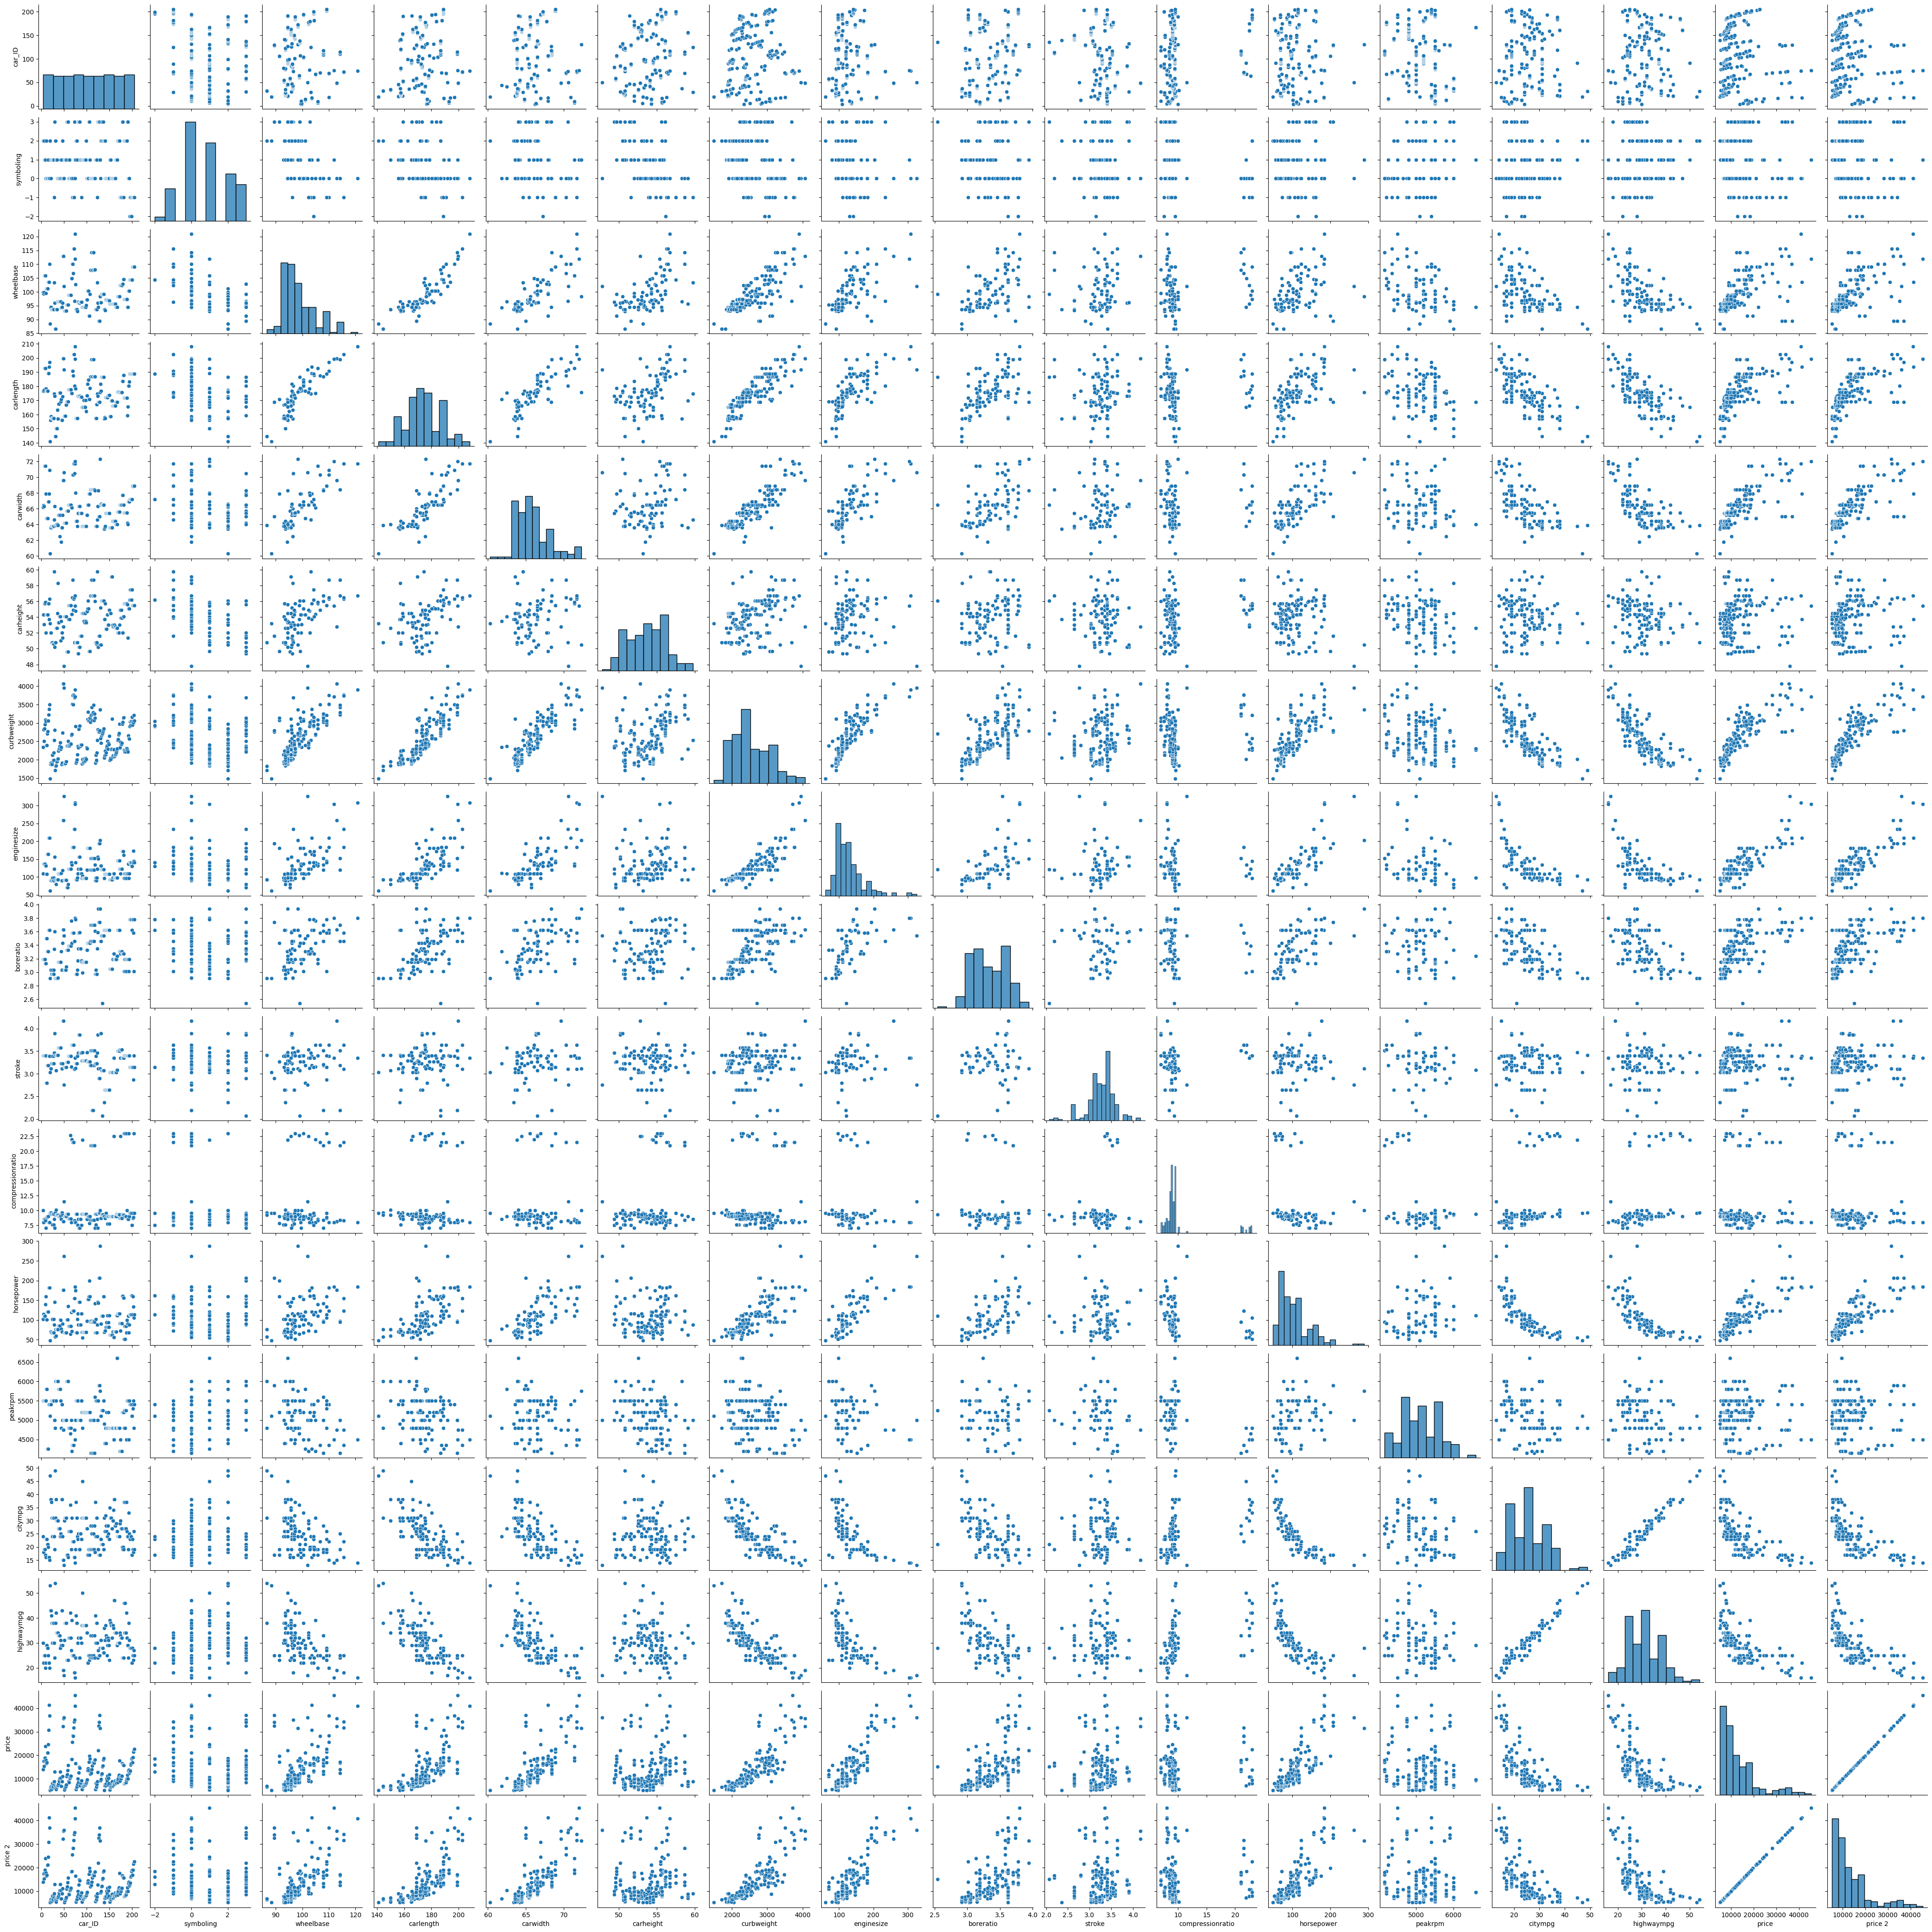

In [ ]:
# Example 1 - Visualize the data using seaborn Pairplots
g = sns.pairplot(raw_data)

# Notes: Do not run this on a big dataset. Filter the columns first

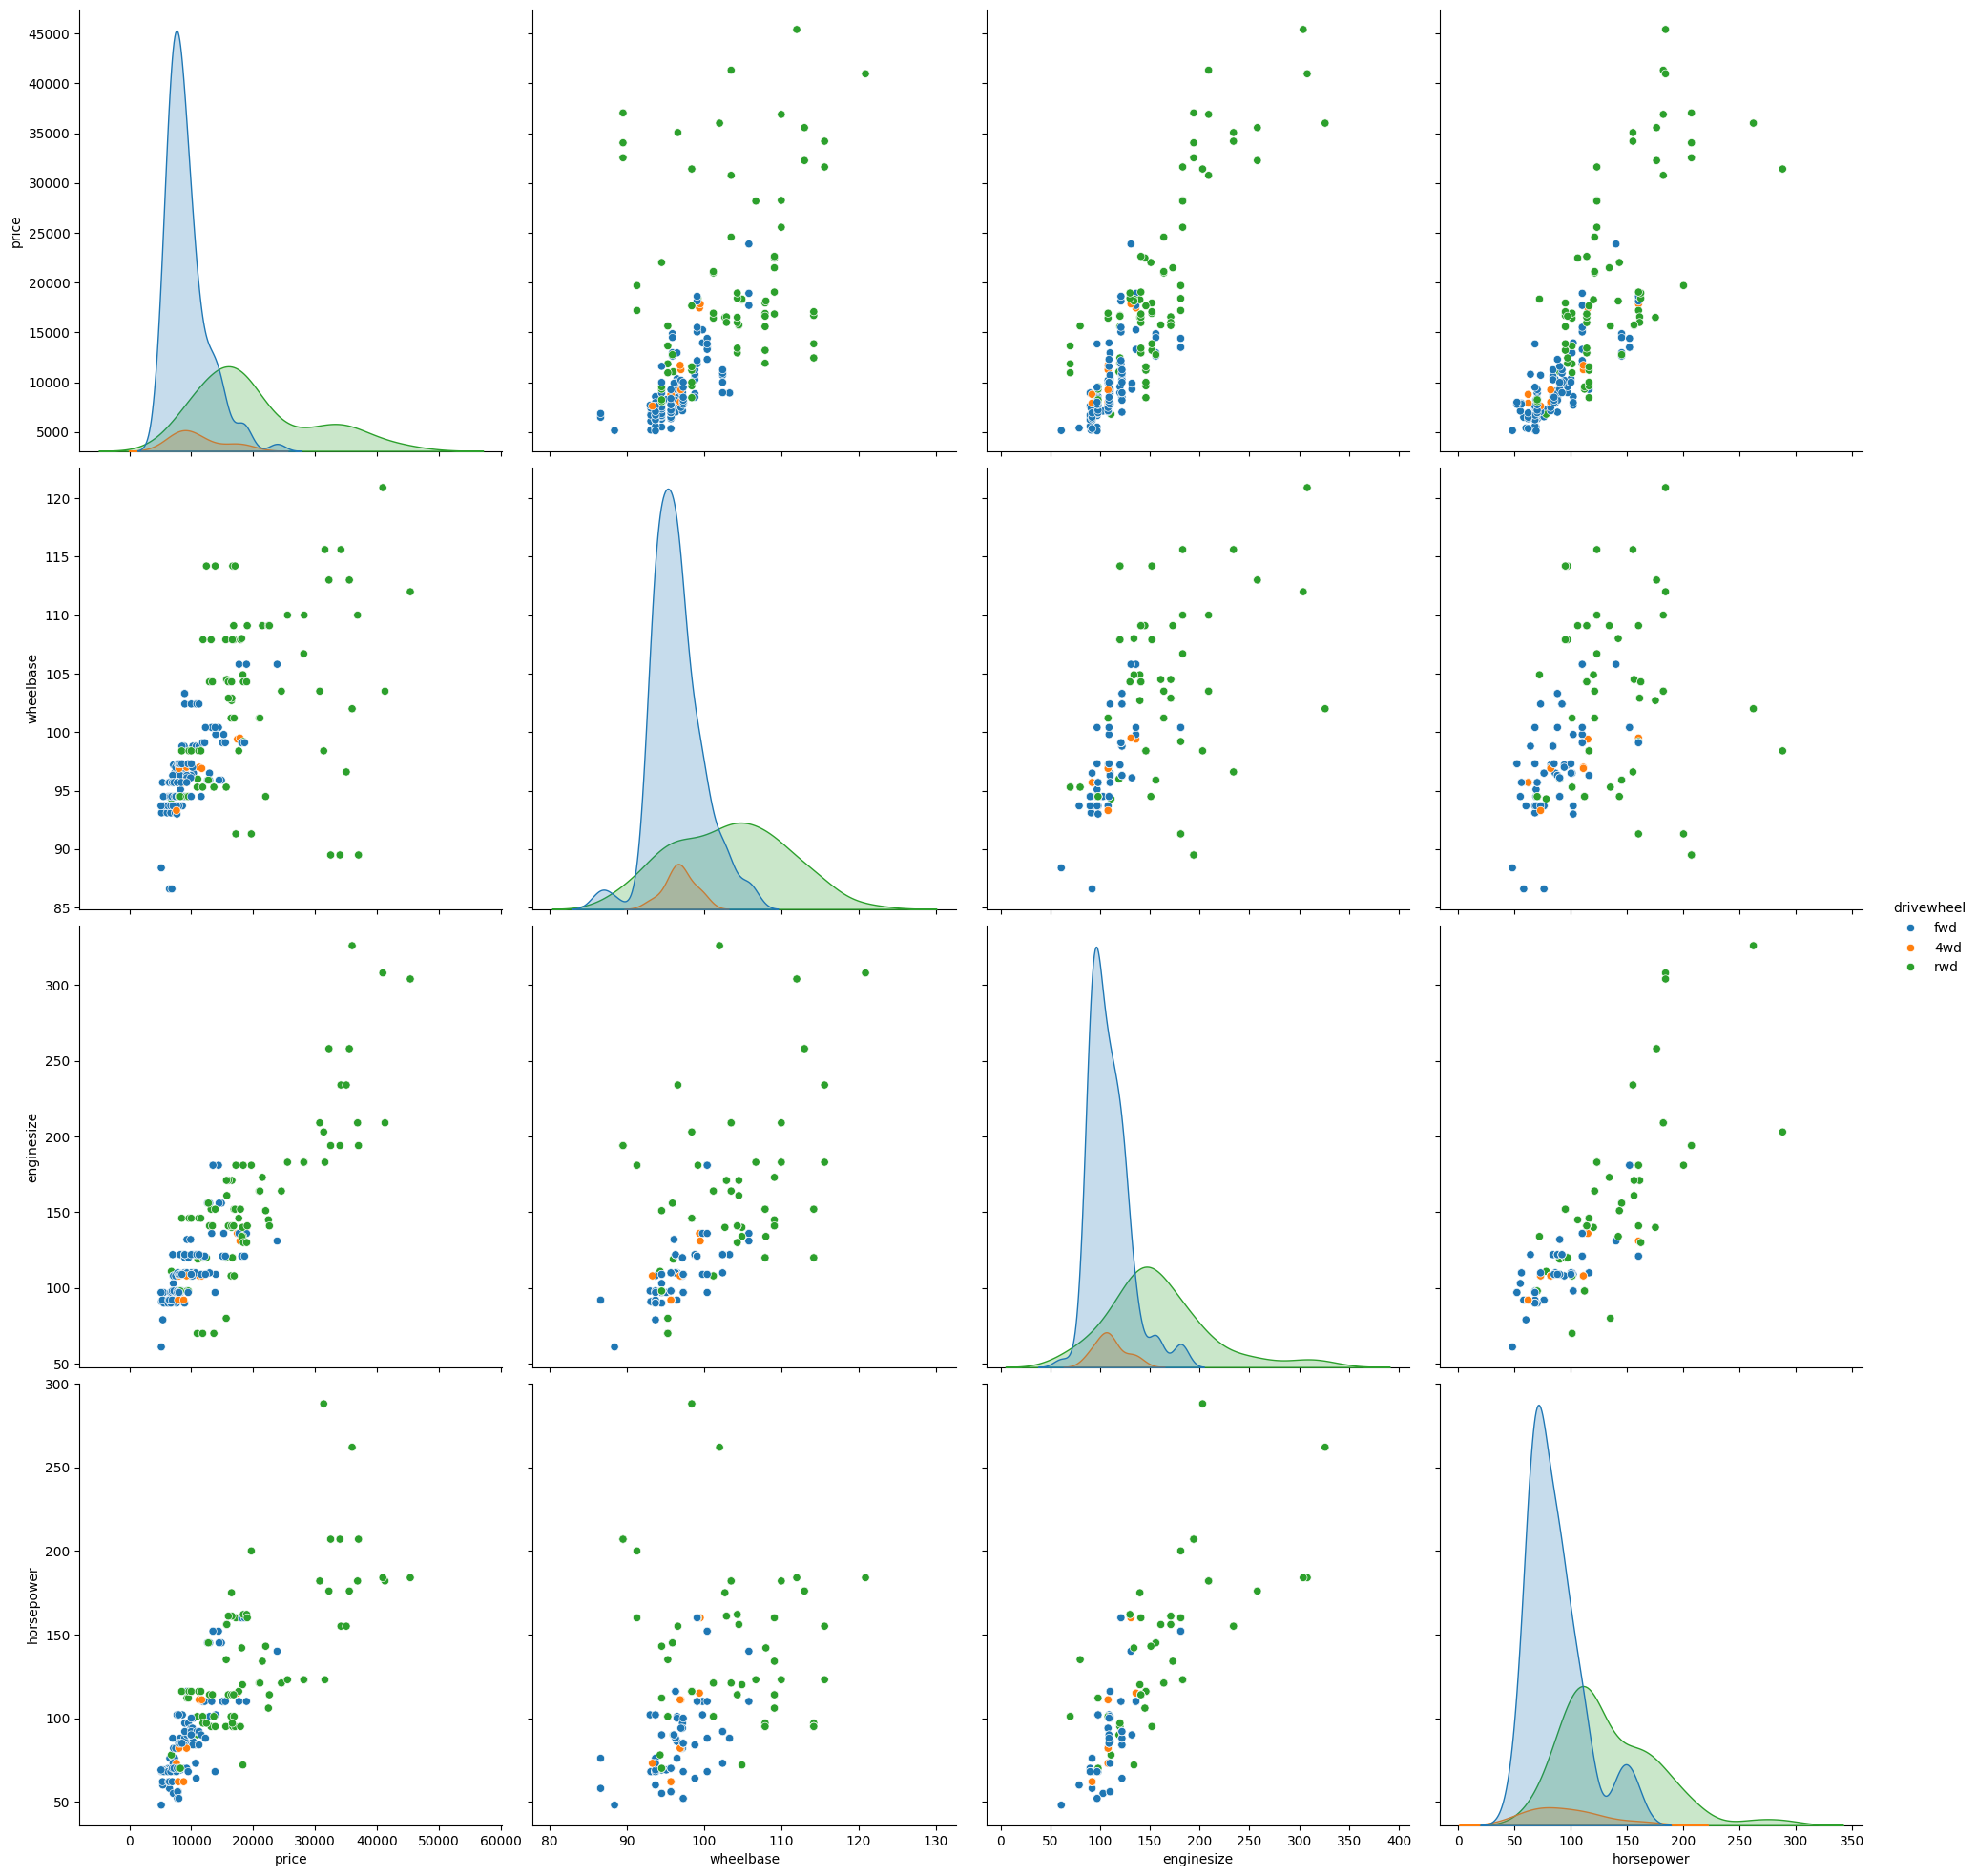

In [ ]:
# Example 2 - Visualising a Subset of our data - important features

g = sns.pairplot(raw_data[['price', 'wheelbase', 'enginesize','horsepower','drivewheel']], hue = 'drivewheel', height = 5)

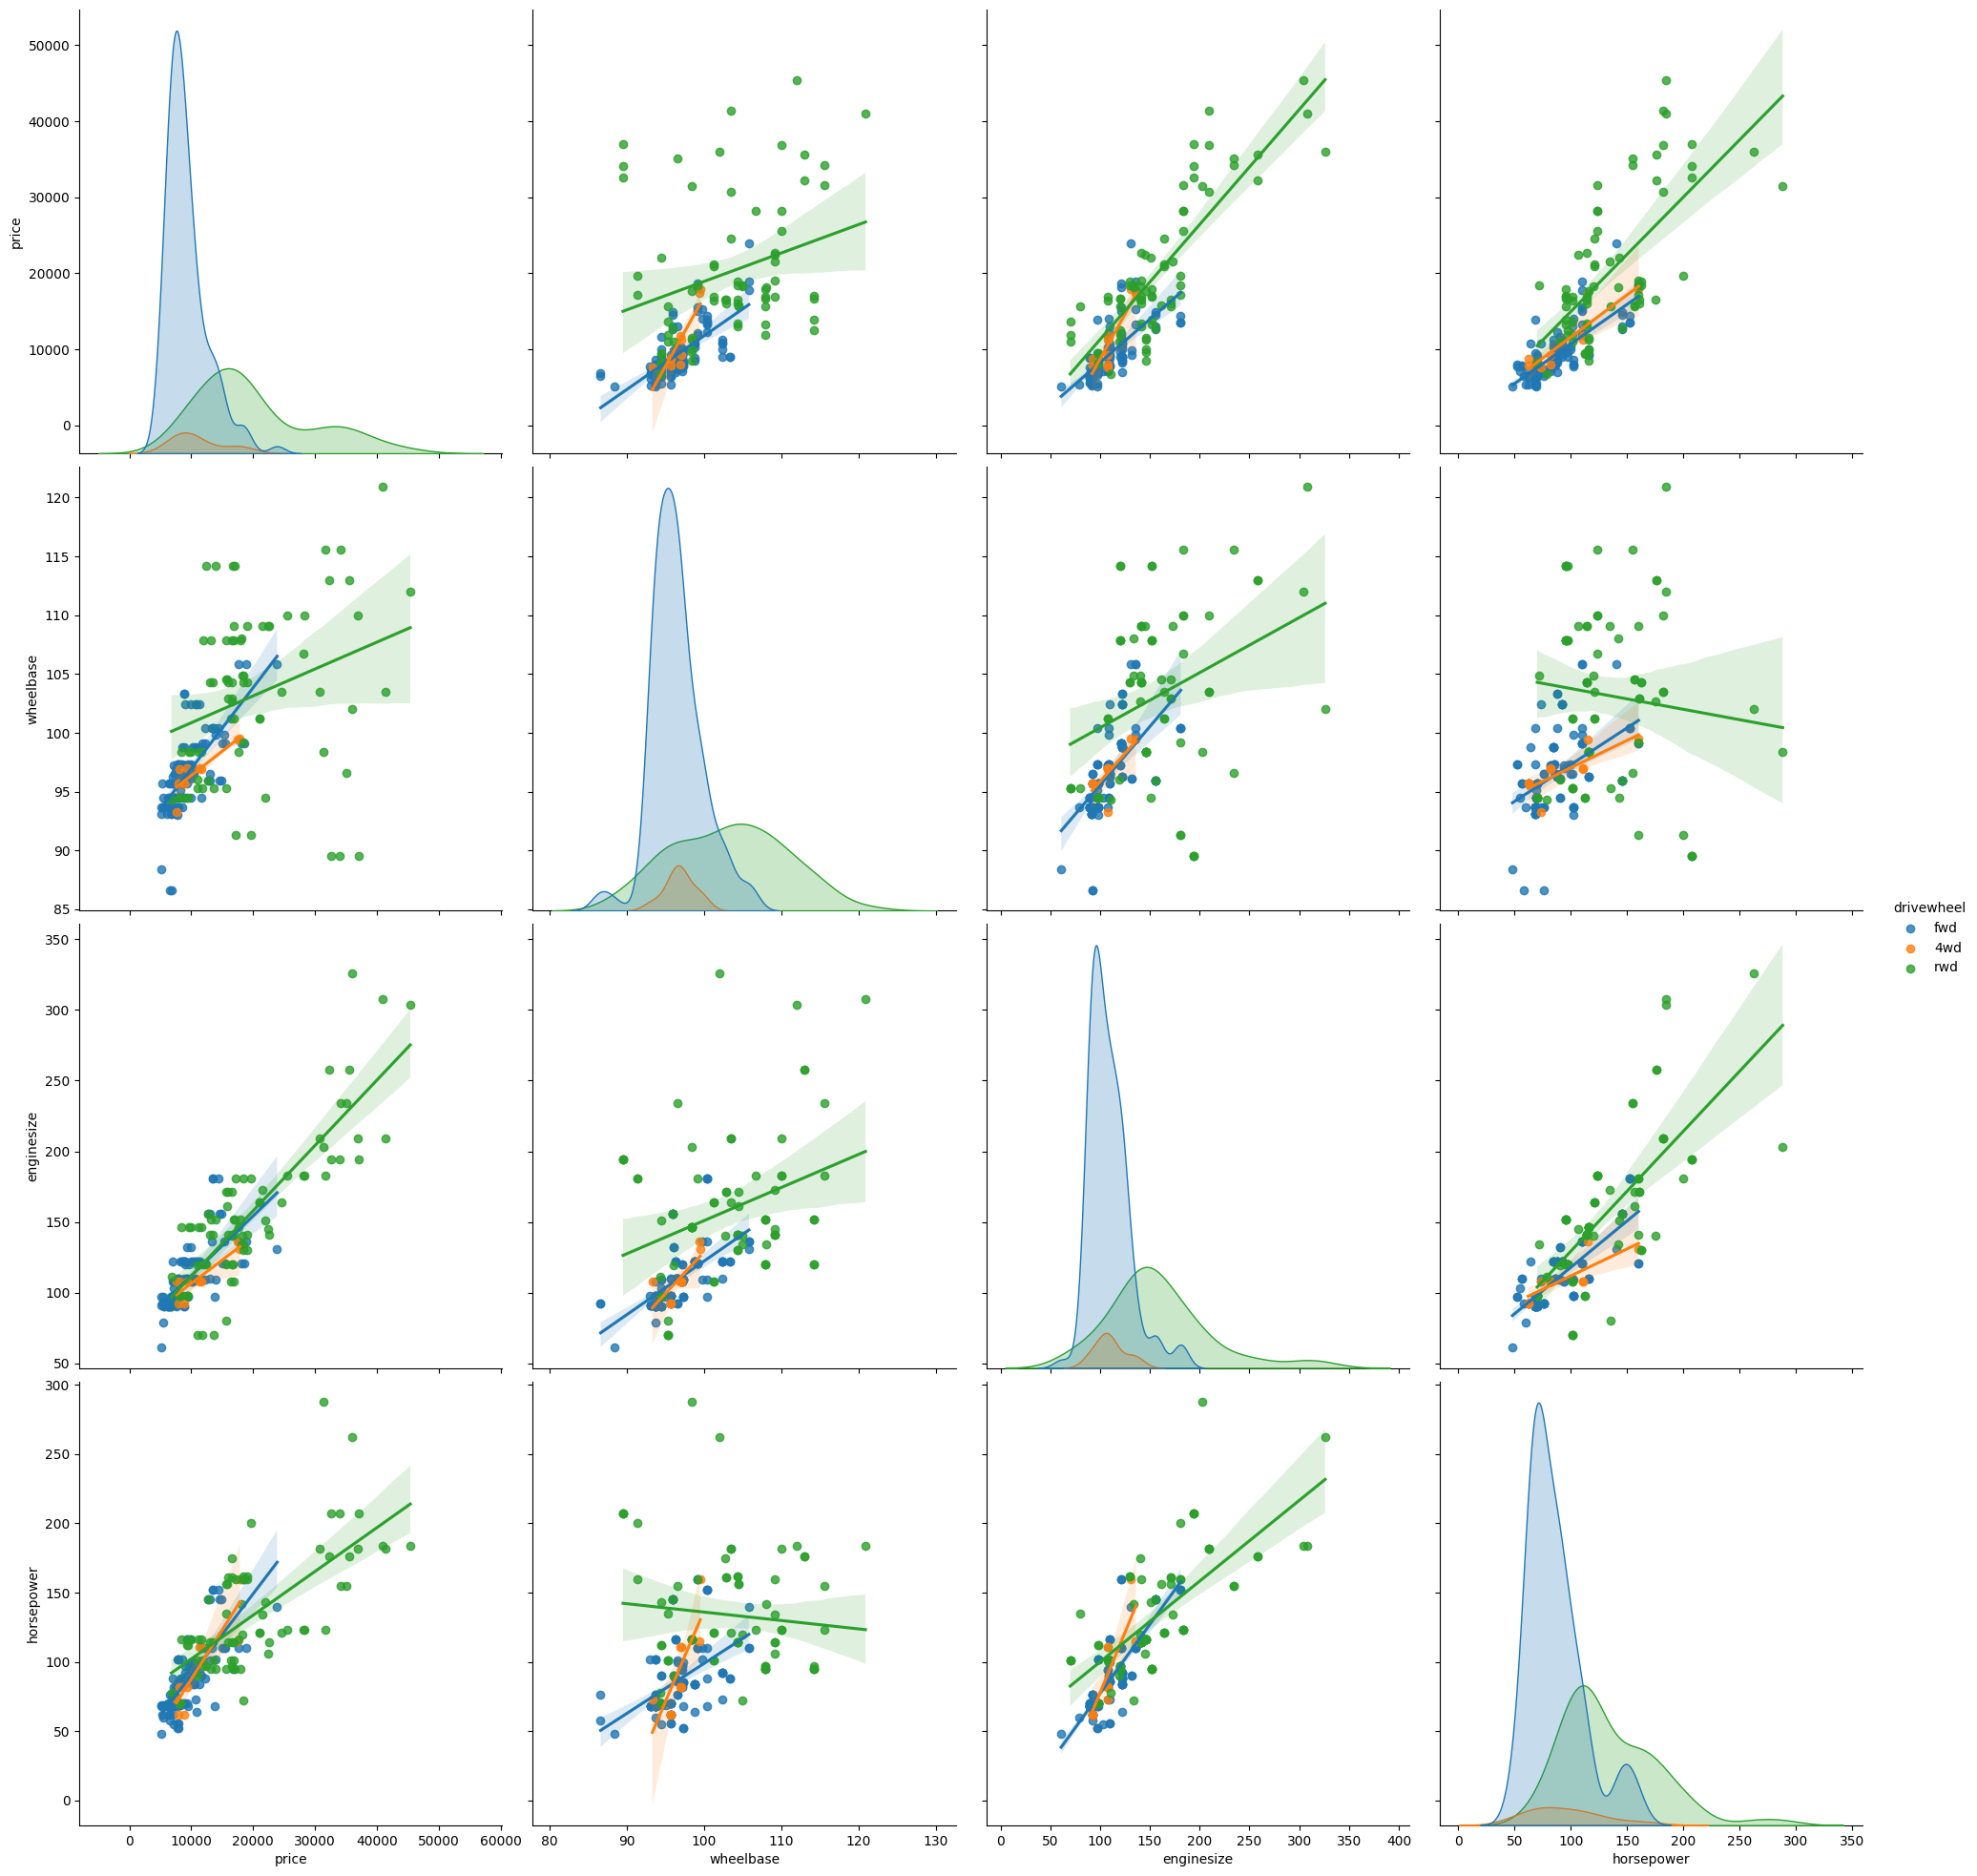

In [ ]:
# Example 3 - Visualising a Subset of our data - important features

g = sns.pairplot(raw_data[['price', 'wheelbase', 'enginesize','horsepower','drivewheel']], hue = 'drivewheel', height = 5, kind="reg")

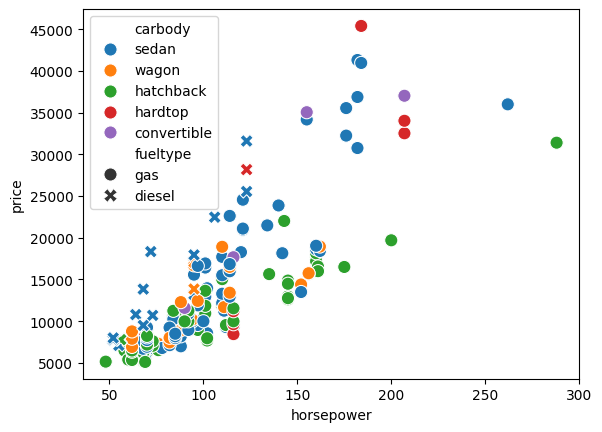

In [ ]:
# Example 4 - Relationship between price and horsepower by carbody

ax = sns.scatterplot(x="horsepower", y="price", data=raw_data, hue = 'carbody', style = 'fueltype', s=90)

## 5.4. Investigating the categorical data

carbody         price
0  convertible  25337.000000
1      hardtop  22208.500000
2    hatchback  10287.908217
3        sedan  14344.270833
4        wagon  12371.960000

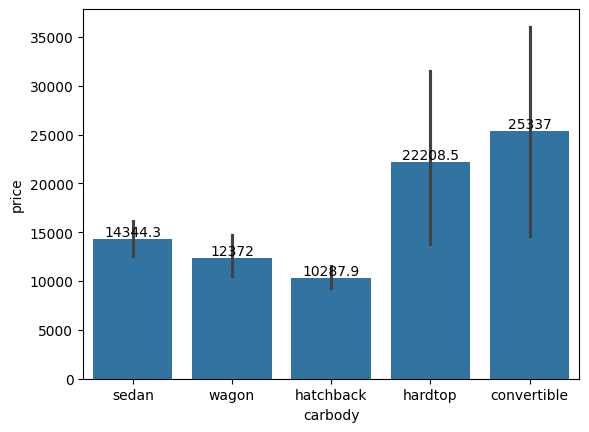

In [ ]:
# Example 5 - Average price by carbody

ax = sns.barplot(x="carbody", y="price", data=raw_data)
ax.bar_label(ax.containers[0])

# Notes:
# 1 - the lines signify the confidence interval
# 2 - Takes mean by default

raw_data[['carbody', 'price']].groupby('carbody', as_index = False).agg({'price':'mean'})

<ipython-input-21-c3f287cb0a81>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  ax = sns.barplot(x=c, y="price", data=raw_data, ci=False) #, hue = 'fueltype')


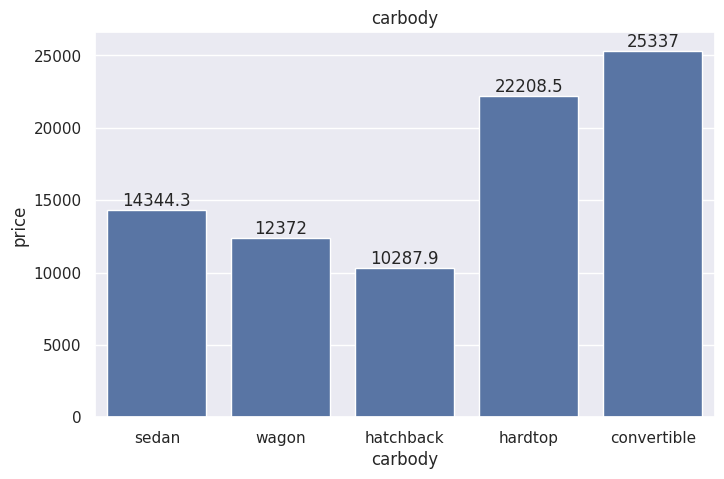

<ipython-input-21-c3f287cb0a81>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  ax = sns.barplot(x=c, y="price", data=raw_data, ci=False) #, hue = 'fueltype')


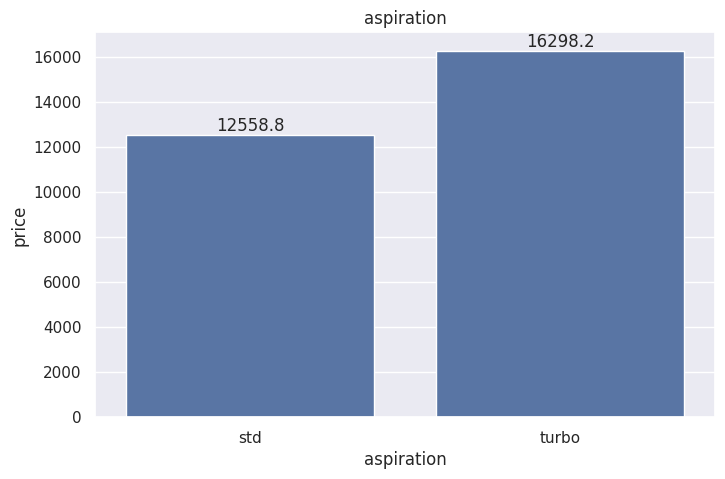

<ipython-input-21-c3f287cb0a81>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  ax = sns.barplot(x=c, y="price", data=raw_data, ci=False) #, hue = 'fueltype')


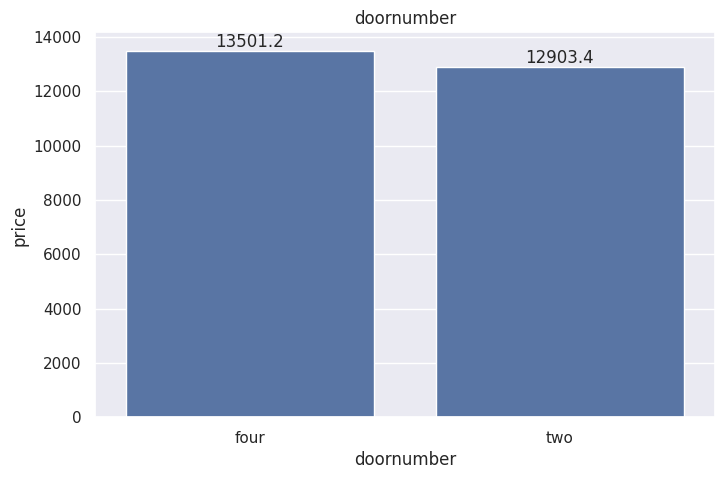

<ipython-input-21-c3f287cb0a81>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  ax = sns.barplot(x=c, y="price", data=raw_data, ci=False) #, hue = 'fueltype')


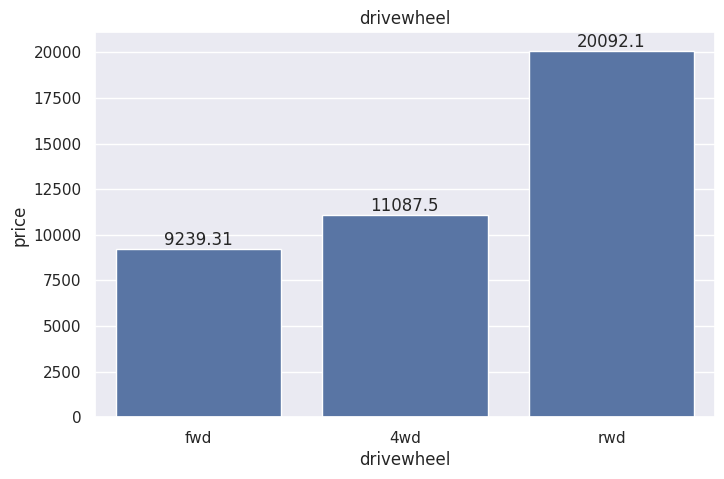

<ipython-input-21-c3f287cb0a81>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  ax = sns.barplot(x=c, y="price", data=raw_data, ci=False) #, hue = 'fueltype')


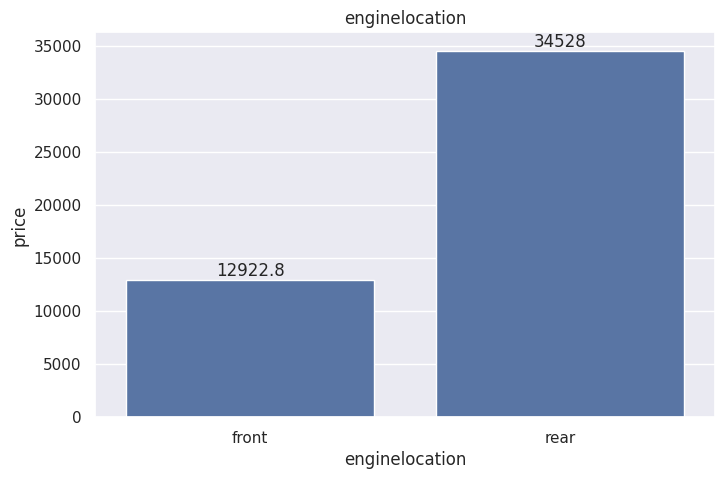

<ipython-input-21-c3f287cb0a81>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  ax = sns.barplot(x=c, y="price", data=raw_data, ci=False) #, hue = 'fueltype')


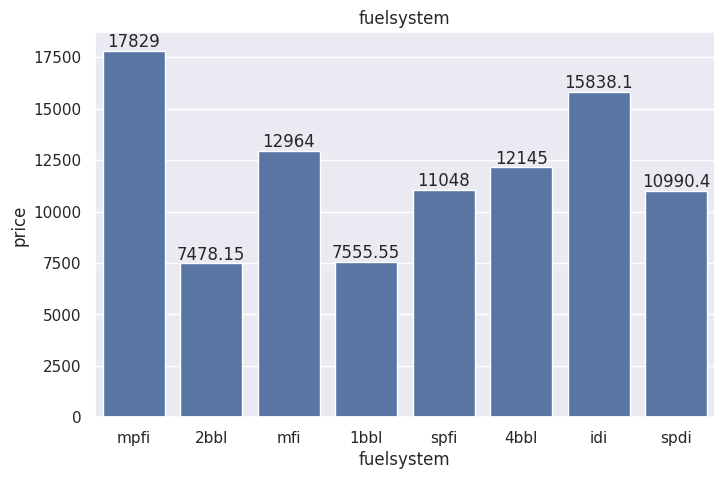

<ipython-input-21-c3f287cb0a81>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  ax = sns.barplot(x=c, y="price", data=raw_data, ci=False) #, hue = 'fueltype')


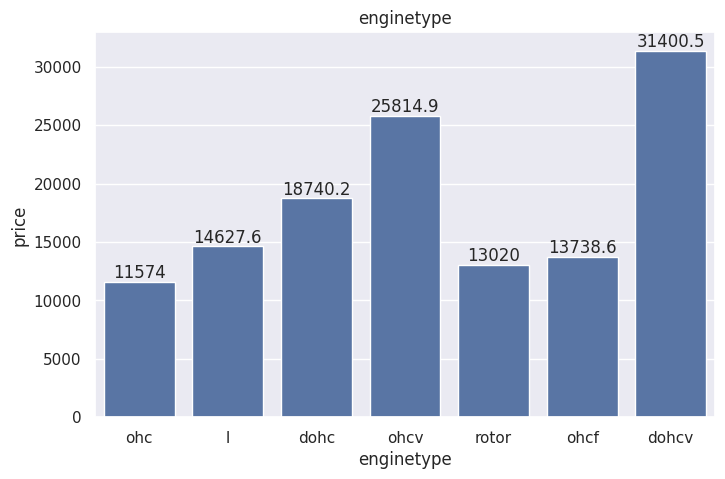

<ipython-input-21-c3f287cb0a81>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  ax = sns.barplot(x=c, y="price", data=raw_data, ci=False) #, hue = 'fueltype')


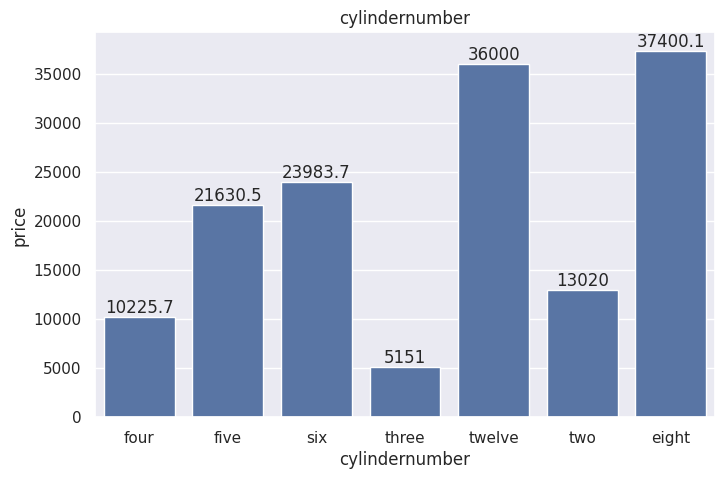

In [ ]:
# Example 6 - Total price by carbody for multible categories

categories = ['carbody', 'aspiration','doornumber','drivewheel','enginelocation', 'fuelsystem', 'enginetype','cylindernumber']

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,5)})

for c in categories:

    ax = sns.barplot(x=c, y="price", data=raw_data, ci=False) #, hue = 'fueltype')
    for container in ax.containers:
        ax.bar_label(container)
    plt.title(c)
    plt.show()

## Investigating the distributions with distribution plots

<ipython-input-81-5007960781a9>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


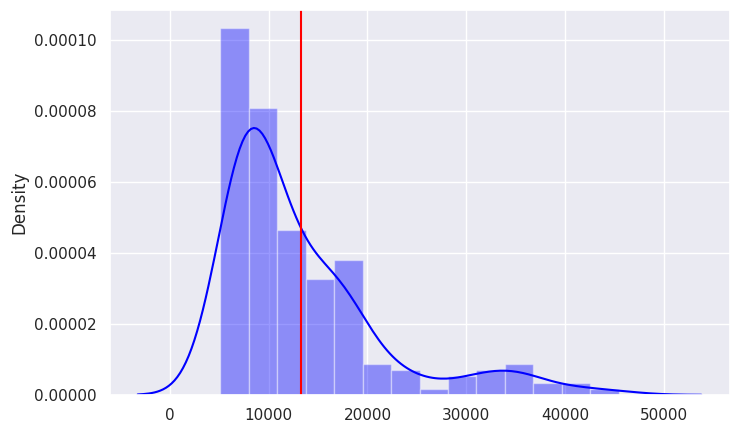

In [ ]:
# Example 7 - Investigating the distribution of price, adding the mean

x = raw_data['price'].values

sns.distplot(x, color = 'blue');

# Calculating the mean
mean = raw_data['price'].mean()

#ploting the mean
plt.axvline(mean, 0,1, color = 'red')

<ipython-input-82-9cb572fdbeeb>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


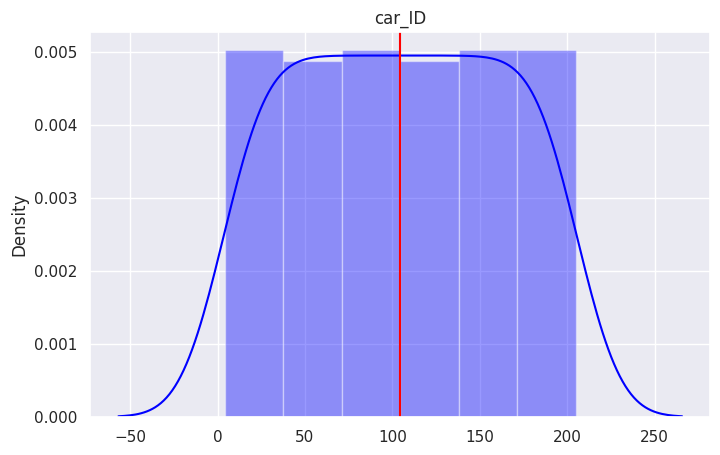

<ipython-input-82-9cb572fdbeeb>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


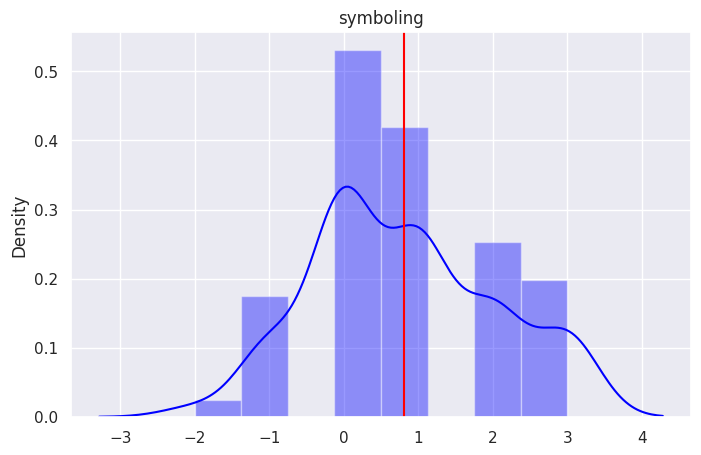

<ipython-input-82-9cb572fdbeeb>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


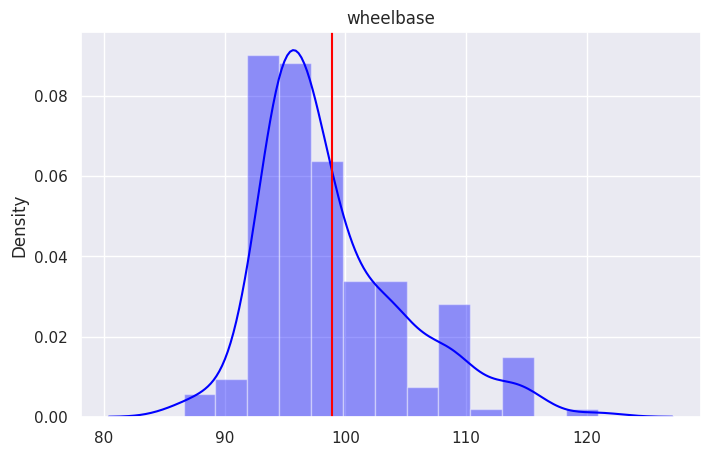

<ipython-input-82-9cb572fdbeeb>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


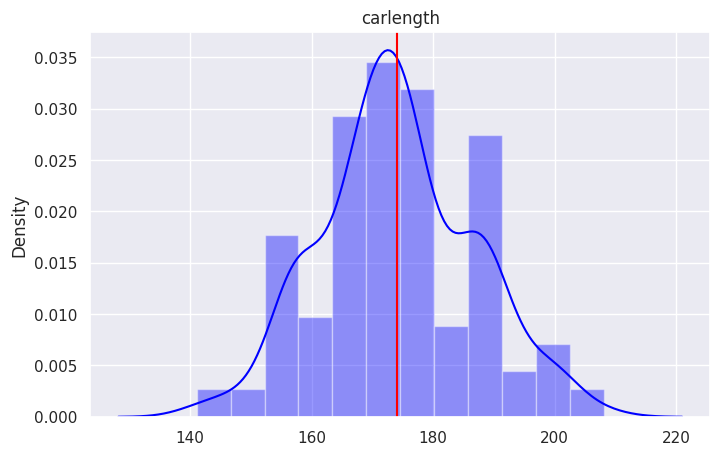

<ipython-input-82-9cb572fdbeeb>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


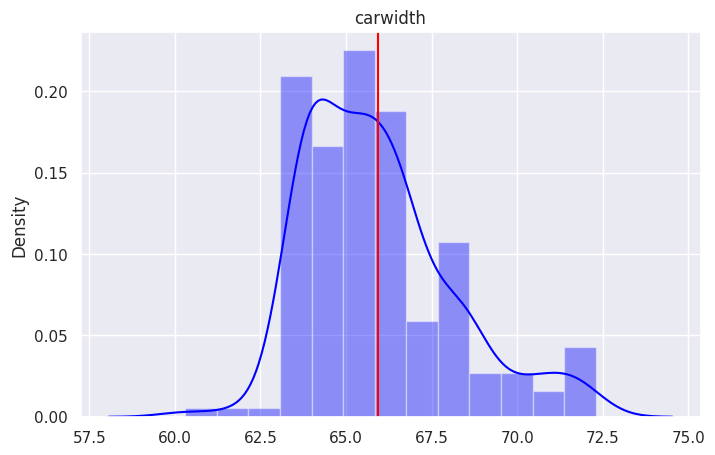

<ipython-input-82-9cb572fdbeeb>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


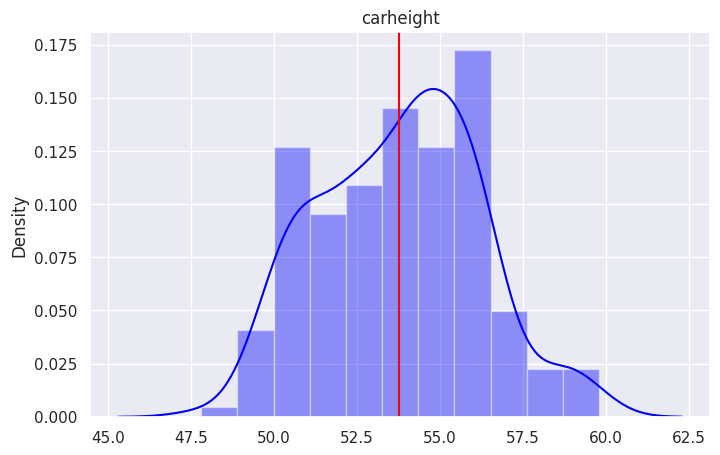

<ipython-input-82-9cb572fdbeeb>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


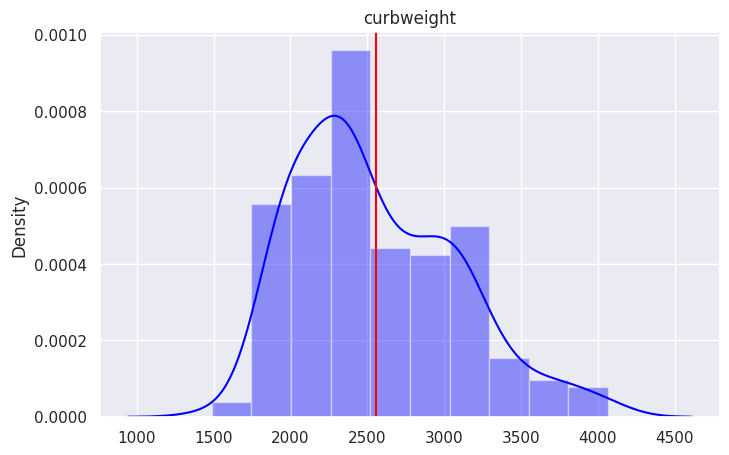

<ipython-input-82-9cb572fdbeeb>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


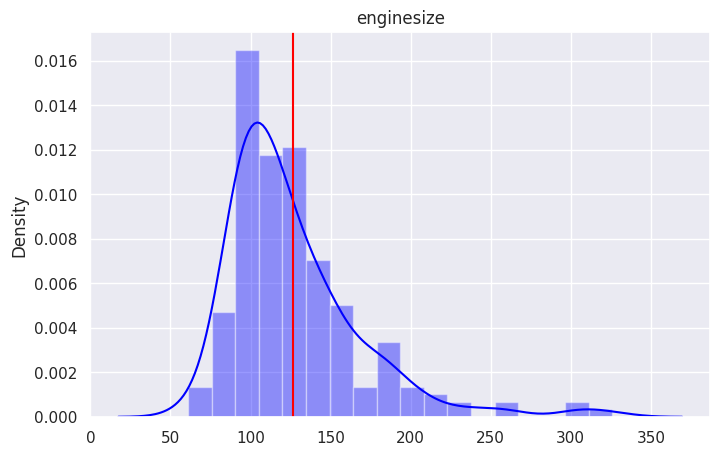

<ipython-input-82-9cb572fdbeeb>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


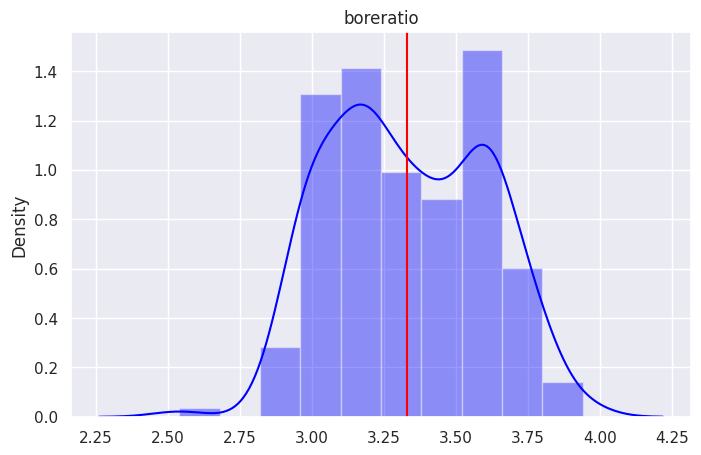

<ipython-input-82-9cb572fdbeeb>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


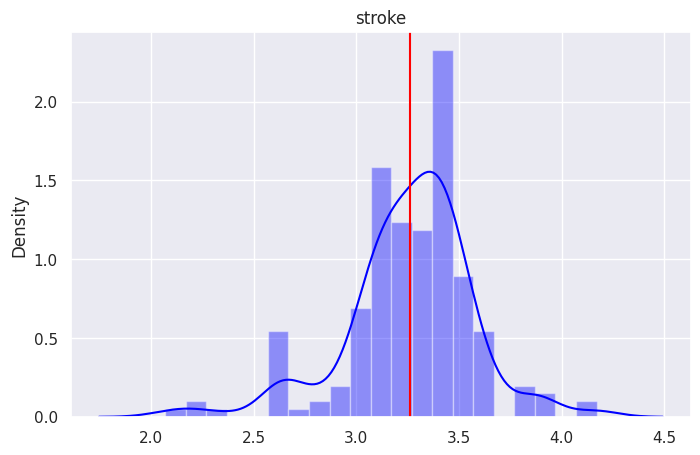

<ipython-input-82-9cb572fdbeeb>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


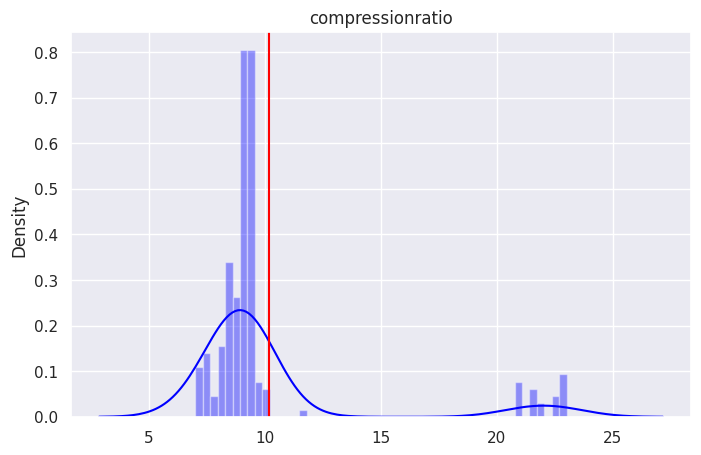

<ipython-input-82-9cb572fdbeeb>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


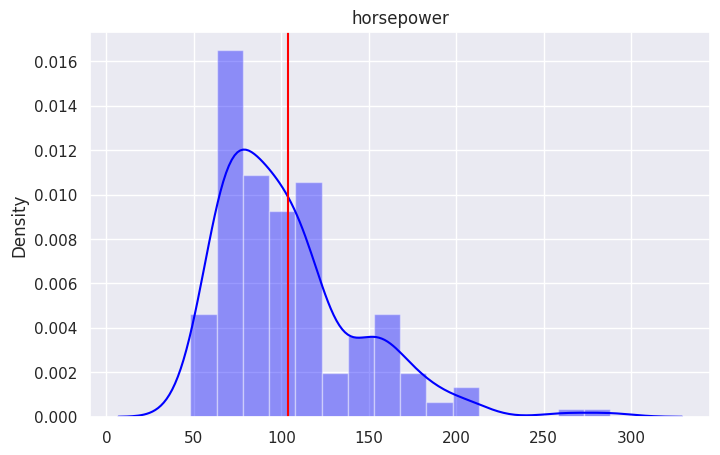

<ipython-input-82-9cb572fdbeeb>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


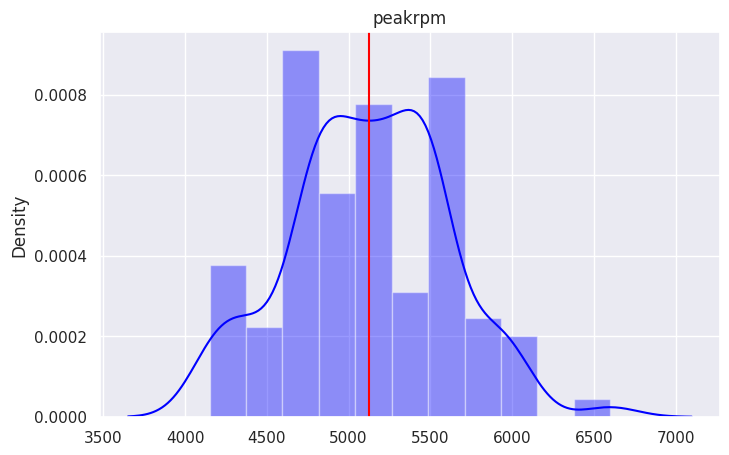

<ipython-input-82-9cb572fdbeeb>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


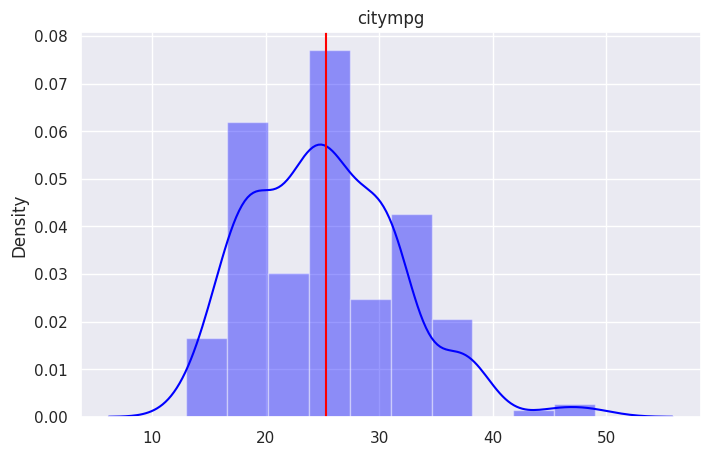

<ipython-input-82-9cb572fdbeeb>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


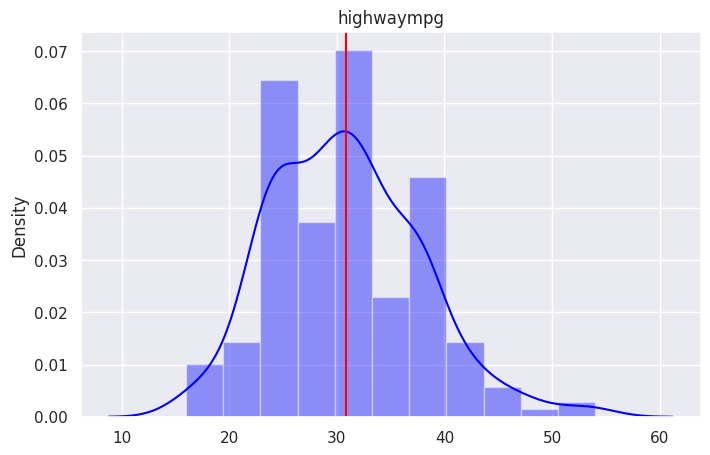

<ipython-input-82-9cb572fdbeeb>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, color = 'blue');


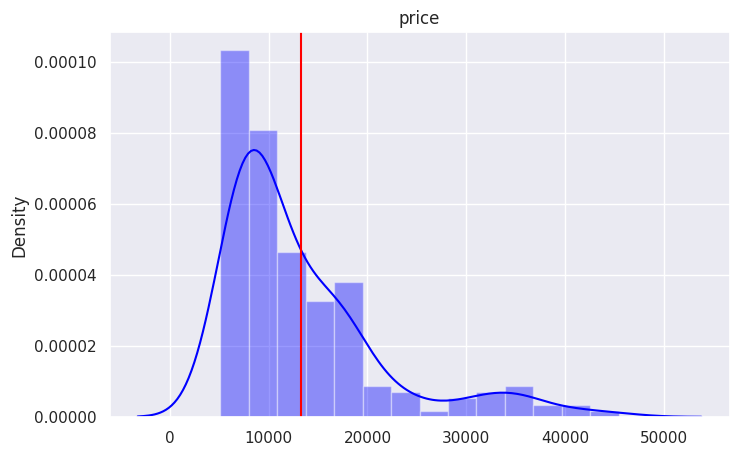

In [ ]:
# Example 8 - Investigating the distribution of all fields, adding the mean

# identifying all numeric columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
n_variables = raw_data.select_dtypes(include=numerics).columns

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,5)})


for n in n_variables:
    x = raw_data[n].values
    sns.distplot(x, color = 'blue');

    # Calculating the mean
    mean = raw_data[n].mean()

    #ploting the mean
    plt.axvline(mean, 0,1, color = 'red')
    plt.title(n)
    plt.show()

In [ ]:
n_variables

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

##  Investigating the distribution and outliers with Box plots

The meadian is:  10221.5


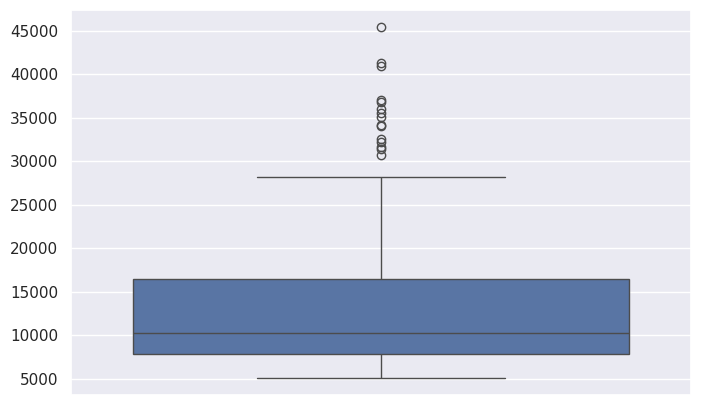

In [ ]:
# Example 9 - Investigating the distribution of Price

x = raw_data['price'].values
ax = sns.boxplot(x)

print('The meadian is: ', raw_data['price'].median())

# Notes:
# The line signifies the median
# The box in the middle show the beginning of Q1 (25th percentile) and the end of the Q3 (75th percentile)
# The whiskers (left - right) show the minimum quartile and maximum quartile
# The dots on the right are "outliers"

The meadian is:  104.5


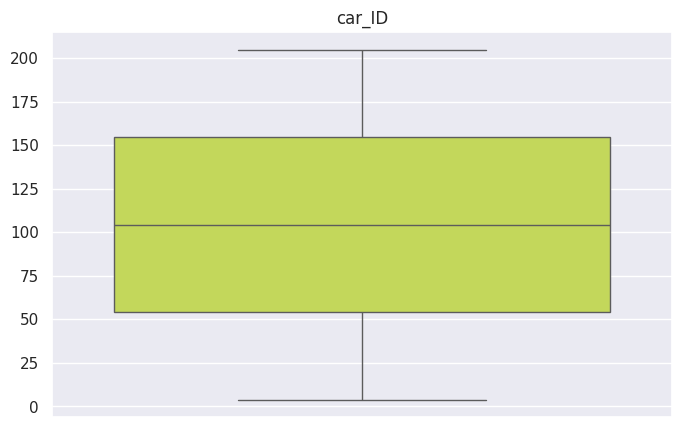

The meadian is:  1.0


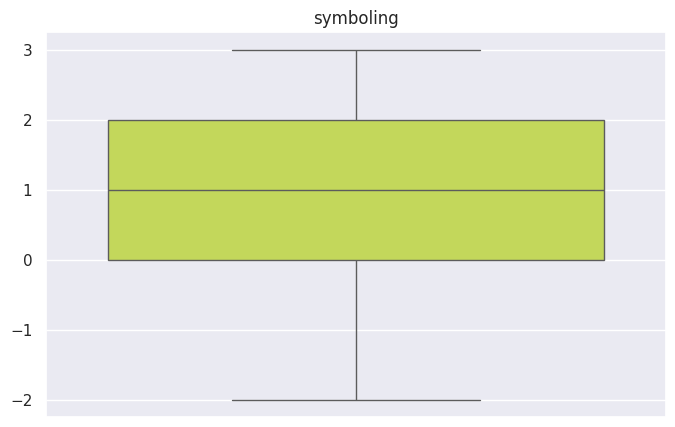

The meadian is:  97.0


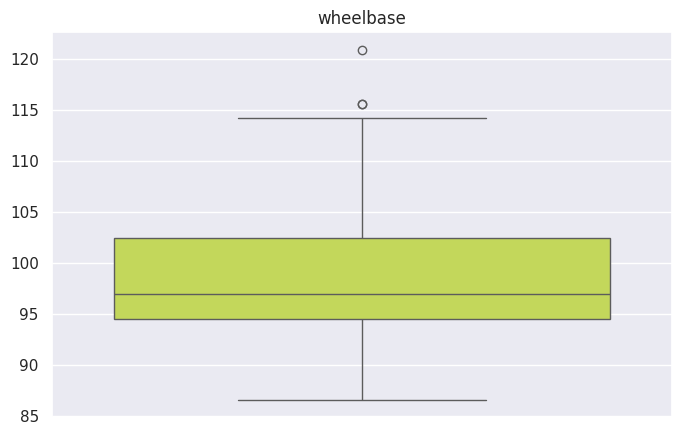

The meadian is:  173.2


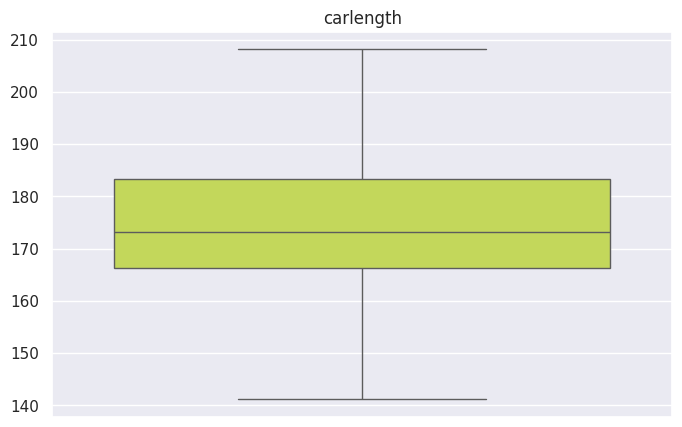

The meadian is:  65.5


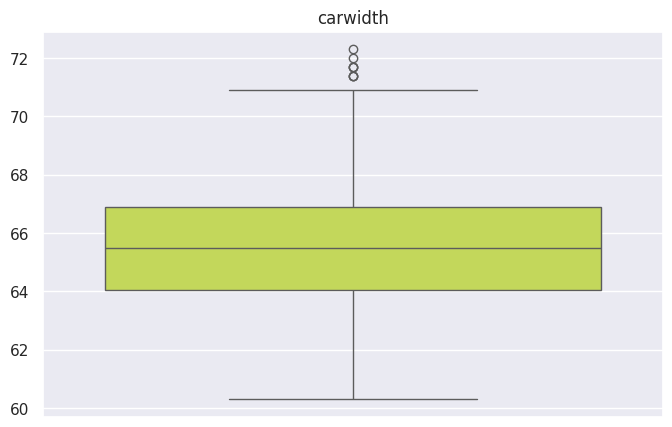

The meadian is:  54.1


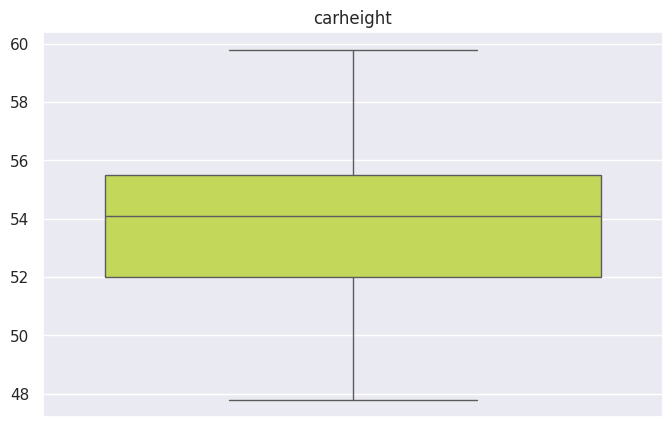

The meadian is:  2412.0


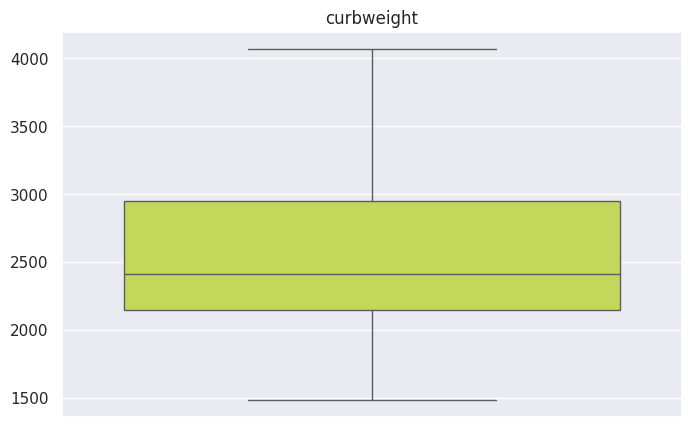

The meadian is:  115.0


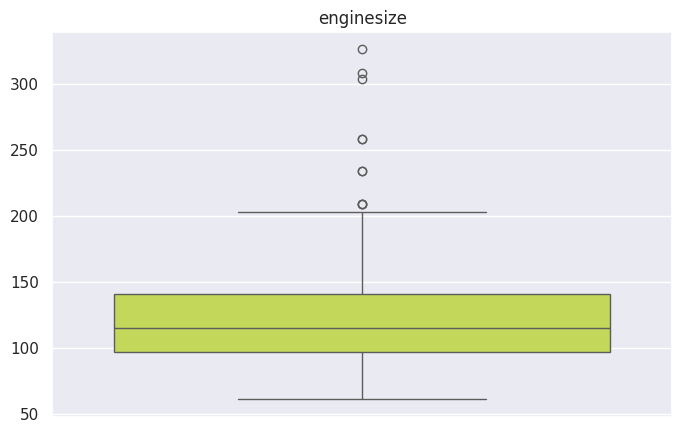

The meadian is:  3.31


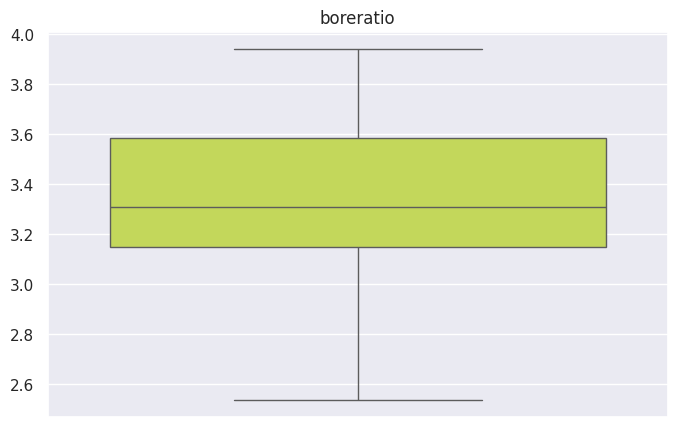

The meadian is:  3.29


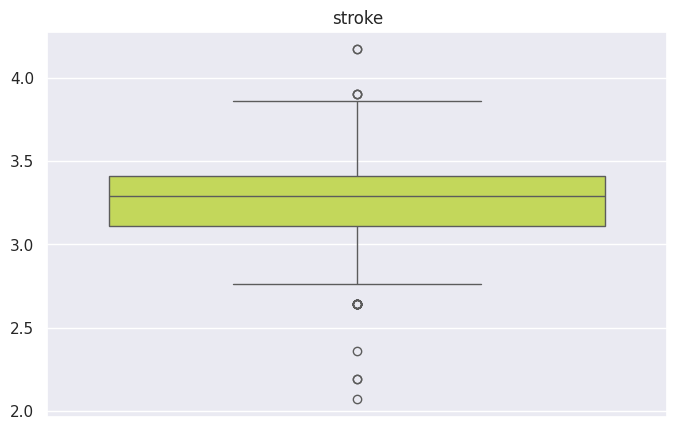

The meadian is:  9.0


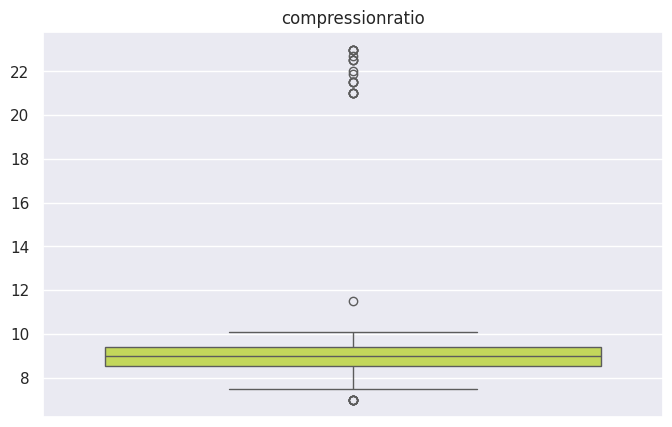

The meadian is:  95.0


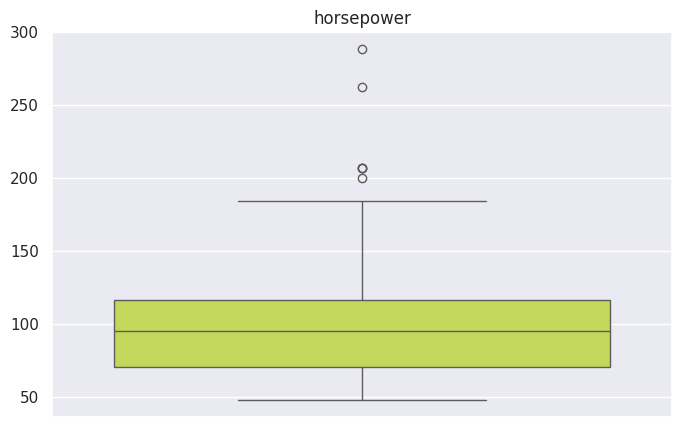

The meadian is:  5200.0


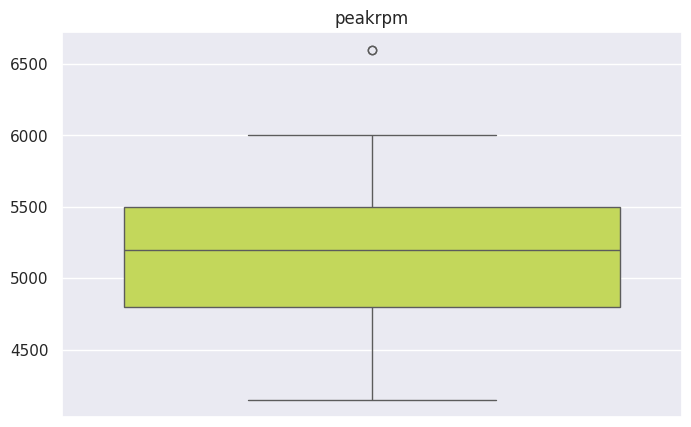

The meadian is:  24.5


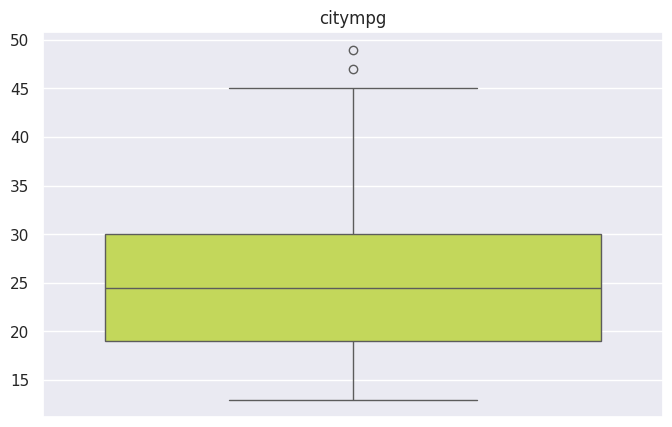

The meadian is:  30.0


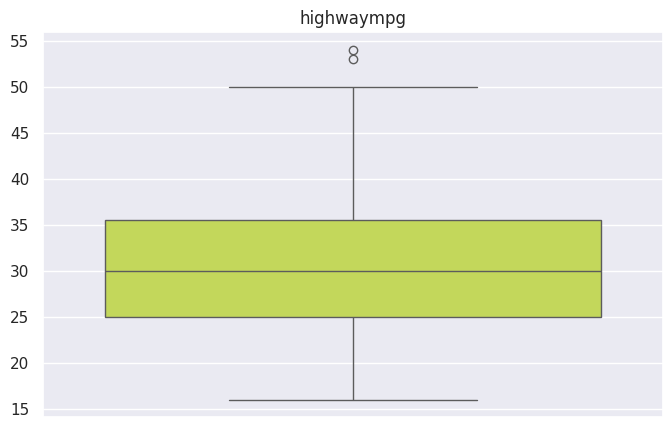

The meadian is:  10221.5


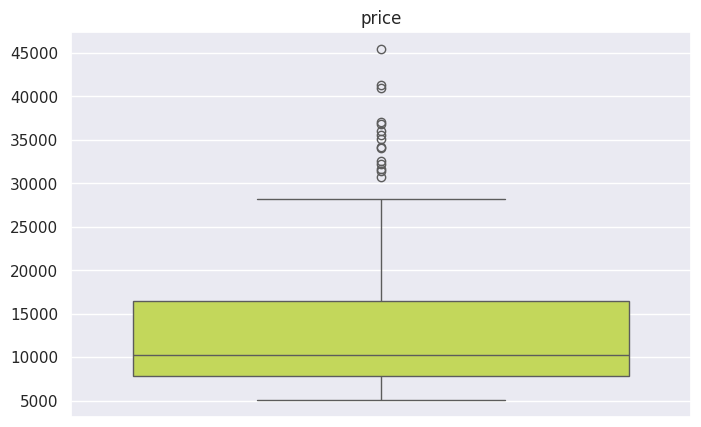

In [ ]:
# Example 10 - Investigating the distribution of all Numerical values

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,5)})

for c in n_variables:
    x = raw_data[c].values
    ax = sns.boxplot(x, color = '#D1EC46')
    print('The meadian is: ', raw_data[c].median())
    plt.title(c)
    plt.show()

## 5.7. Converting the categorical values into numerical representation

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
raw_data.head()

car_ID  symboling      CarName fueltype aspiration doornumber carbody  \
3       4          2  audi 100 ls      gas        std       four   sedan   
4       5          2   audi 100ls      gas        std       four   sedan   
5       6          2     audi fox      gas        std        two   sedan   
6       7          1   audi 100ls      gas        std       four   sedan   
7       8          1    audi 5000      gas        std       four   wagon   

  drivewheel enginelocation  wheelbase  ...  fuelsystem  boreratio  stroke  \
3        fwd          front       99.8  ...        mpfi       3.19     3.4   
4        4wd          front       99.4  ...        mpfi       3.19     3.4   
5        fwd          front       99.8  ...        mpfi       3.19     3.4   
6        fwd          front      105.8  ...        mpfi       3.19     3.4   
7        fwd          front      105.8  ...        mpfi       3.19     3.4   

   compressionratio horsepower peakrpm  citympg highwaympg    price  price 2  
3              10.0        102    5500       24         30  13950.0  13950.0  
4               8.0        115    5500       18         22  17450.0  17450.0  
5               8.5        110    5500       19         25  15250.0  15250.0  
6               8.5        110    5500       19         25  17710.0  17710.0  
7               8.5        110    5500       19         25  18920.0  18920.0  

[5 rows x 27 columns]

In [ ]:
# Making categorical variables into numeric representation

new_raw_data1 = pd.get_dummies(raw_data, columns = ['carbody', 'aspiration','doornumber','drivewheel','enginelocation', 'fuelsystem', 'enginetype', 'fueltype'])
new_raw_data1.head()

car_ID  symboling      CarName  wheelbase  carlength  carwidth  carheight  \
3       4          2  audi 100 ls       99.8      176.6      66.2       54.3   
4       5          2   audi 100ls       99.4      176.6      66.4       54.3   
5       6          2     audi fox       99.8      177.3      66.3       53.1   
6       7          1   audi 100ls      105.8      192.7      71.4       55.7   
7       8          1    audi 5000      105.8      192.7      71.4       55.7   

   curbweight cylindernumber  enginesize  ...  fuelsystem_spfi  \
3        2337           four         109  ...            False   
4        2824           five         136  ...            False   
5        2507           five         136  ...            False   
6        2844           five         136  ...            False   
7        2954           five         136  ...            False   

   enginetype_dohc  enginetype_dohcv  enginetype_l  enginetype_ohc  \
3            False             False         False            True   
4            False             False         False            True   
5            False             False         False            True   
6            False             False         False            True   
7            False             False         False            True   

   enginetype_ohcf  enginetype_ohcv  enginetype_rotor  fueltype_diesel  \
3            False            False             False            False   
4            False            False             False            False   
5            False            False             False            False   
6            False            False             False            False   
7            False            False             False            False   

   fueltype_gas  
3          True  
4          True  
5          True  
6          True  
7          True  

[5 rows x 50 columns]

In [ ]:
#Rectifying
new_raw_data1 = pd.get_dummies(raw_data, columns=['carbody', 'aspiration', 'doornumber', 'drivewheel', 'enginelocation', 'fuelsystem', 'enginetype', 'fueltype'], dtype=int)
new_raw_data1.head(3)


car_ID  symboling      CarName  wheelbase  carlength  carwidth  carheight  \
3       4          2  audi 100 ls       99.8      176.6      66.2       54.3   
4       5          2   audi 100ls       99.4      176.6      66.4       54.3   
5       6          2     audi fox       99.8      177.3      66.3       53.1   

   curbweight cylindernumber  enginesize  ...  fuelsystem_spfi  \
3        2337           four         109  ...                0   
4        2824           five         136  ...                0   
5        2507           five         136  ...                0   

   enginetype_dohc  enginetype_dohcv  enginetype_l  enginetype_ohc  \
3                0                 0             0               1   
4                0                 0             0               1   
5                0                 0             0               1   

   enginetype_ohcf  enginetype_ohcv  enginetype_rotor  fueltype_diesel  \
3                0                0                 0                0   
4                0                0                 0                0   
5                0                0                 0                0   

   fueltype_gas  
3             1  
4             1  
5             1  

[3 rows x 50 columns]

In [ ]:

new_raw_data1['cylindernumber'].loc[new_raw_data1['cylindernumber'] == 'two'] = 2
new_raw_data1['cylindernumber'].loc[new_raw_data1['cylindernumber'] == 'three'] = 3
new_raw_data1['cylindernumber'].loc[new_raw_data1['cylindernumber'] == 'four'] = 4
new_raw_data1['cylindernumber'].loc[new_raw_data1['cylindernumber'] == 'five'] = 5
new_raw_data1['cylindernumber'].loc[new_raw_data1['cylindernumber'] == 'six'] = 6
new_raw_data1['cylindernumber'].loc[new_raw_data1['cylindernumber'] == 'eight'] = 8
new_raw_data1['cylindernumber'].loc[new_raw_data1['cylindernumber'] == 'twelve'] = 12
new_raw_data1['cylindernumber'] = new_raw_data1['cylindernumber'].astype(int)

warnings.simplefilter(action='ignore', category=FutureWarning)

new_raw_data1.dtypes

<ipython-input-27-9d32fede1852>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_raw_data1['cylindernumber'].loc[new_raw_data1['cylindernumber'] == 'two'] = 2
<ipython-input-27-9d32fede1852>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_raw_data1['cylindernumber'].loc[new_raw_data1['cylindernumber'] == 'three'] = 3
<ipython-input-27-9d32fede1852>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_raw_data1['cylindernumber'

car_ID                    int64
symboling                 int64
CarName                  object
wheelbase               float64
carlength               float64
carwidth                float64
carheight               float64
curbweight                int64
cylindernumber            int64
enginesize                int64
boreratio               float64
stroke                  float64
compressionratio        float64
horsepower                int64
peakrpm                   int64
citympg                   int64
highwaympg                int64
price                   float64
price 2                 float64
carbody_convertible       int64
carbody_hardtop           int64
carbody_hatchback         int64
carbody_sedan             int64
carbody_wagon             int64
aspiration_std            int64
aspiration_turbo          int64
doornumber_four           int64
doornumber_two            int64
drivewheel_4wd            int64
drivewheel_fwd            int64
drivewheel_rwd            int64
enginelo

In [ ]:
new_raw_data1.head()

car_ID  symboling      CarName  wheelbase  carlength  carwidth  carheight  \
3       4          2  audi 100 ls       99.8      176.6      66.2       54.3   
4       5          2   audi 100ls       99.4      176.6      66.4       54.3   
5       6          2     audi fox       99.8      177.3      66.3       53.1   
6       7          1   audi 100ls      105.8      192.7      71.4       55.7   
7       8          1    audi 5000      105.8      192.7      71.4       55.7   

   curbweight  cylindernumber  enginesize  ...  fuelsystem_spfi  \
3        2337               4         109  ...                0   
4        2824               5         136  ...                0   
5        2507               5         136  ...                0   
6        2844               5         136  ...                0   
7        2954               5         136  ...                0   

   enginetype_dohc  enginetype_dohcv  enginetype_l  enginetype_ohc  \
3                0                 0             0               1   
4                0                 0             0               1   
5                0                 0             0               1   
6                0                 0             0               1   
7                0                 0             0               1   

   enginetype_ohcf  enginetype_ohcv  enginetype_rotor  fueltype_diesel  \
3                0                0                 0                0   
4                0                0                 0                0   
5                0                0                 0                0   
6                0                0                 0                0   
7                0                0                 0                0   

   fueltype_gas  
3             1  
4             1  
5             1  
6             1  
7             1  

[5 rows x 50 columns]

In [ ]:
#Exchanging the data
new_raw_data = new_raw_data1
new_raw_data.head()

car_ID  symboling      CarName  wheelbase  carlength  carwidth  carheight  \
3       4          2  audi 100 ls       99.8      176.6      66.2       54.3   
4       5          2   audi 100ls       99.4      176.6      66.4       54.3   
5       6          2     audi fox       99.8      177.3      66.3       53.1   
6       7          1   audi 100ls      105.8      192.7      71.4       55.7   
7       8          1    audi 5000      105.8      192.7      71.4       55.7   

   curbweight  cylindernumber  enginesize  ...  fuelsystem_spfi  \
3        2337               4         109  ...                0   
4        2824               5         136  ...                0   
5        2507               5         136  ...                0   
6        2844               5         136  ...                0   
7        2954               5         136  ...                0   

   enginetype_dohc  enginetype_dohcv  enginetype_l  enginetype_ohc  \
3                0                 0             0               1   
4                0                 0             0               1   
5                0                 0             0               1   
6                0                 0             0               1   
7                0                 0             0               1   

   enginetype_ohcf  enginetype_ohcv  enginetype_rotor  fueltype_diesel  \
3                0                0                 0                0   
4                0                0                 0                0   
5                0                0                 0                0   
6                0                0                 0                0   
7                0                0                 0                0   

   fueltype_gas  
3             1  
4             1  
5             1  
6             1  
7             1  

[5 rows x 50 columns]

### Heatmap

- First we need to create a "Dataset" to display on a Heatmap - we will use a correlation dataset
- .corr() is used to find the pairwise correlation of all columns in the dataframe. Any null values are automatically excluded
- The closer to 1 or -1 the better. As one variable increases, the other variable tends to also increase / decrease
- More Info here: https://statisticsbyjim.com/basics/correlations/

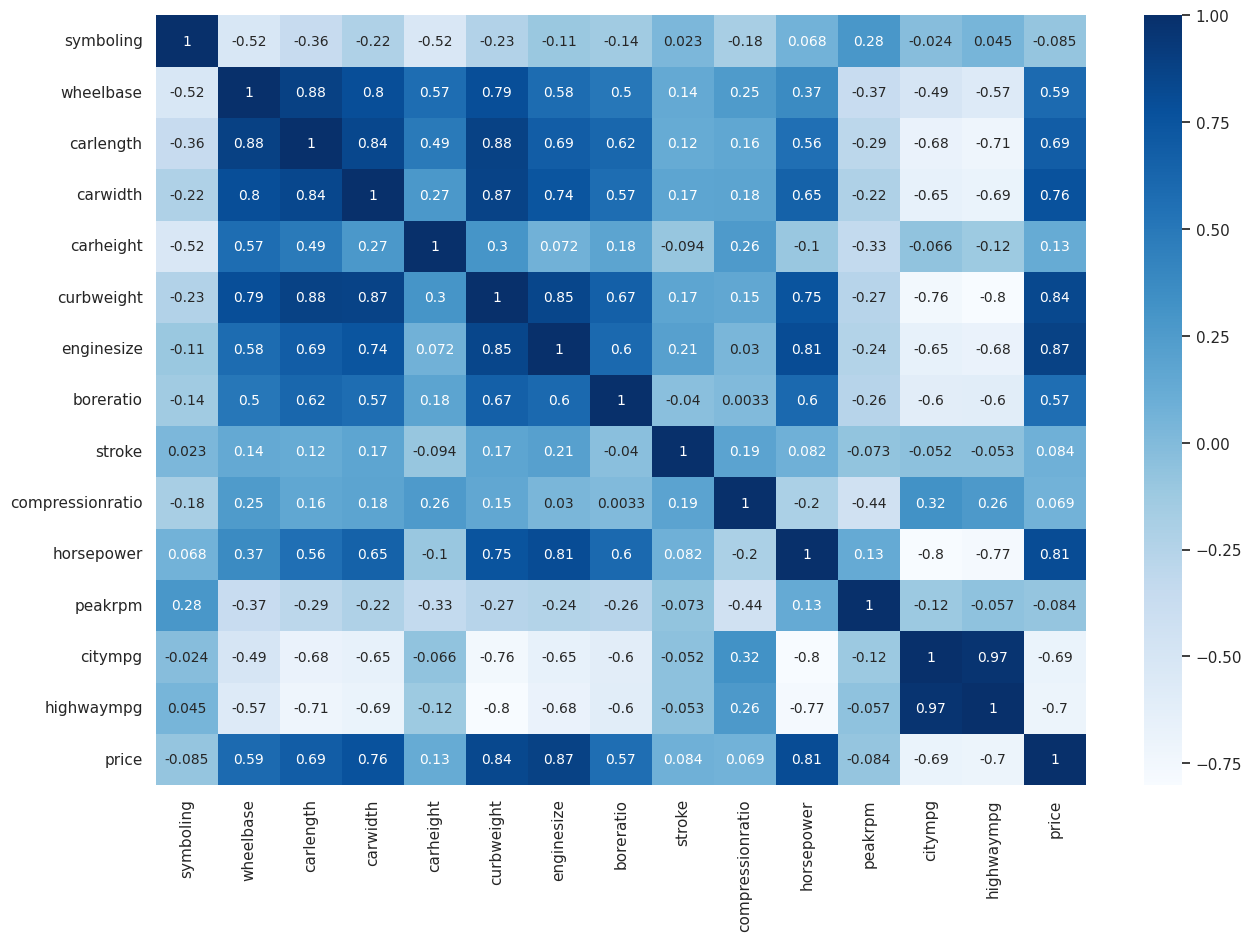

In [ ]:
# Example 12 - Heatmap

# droping columns we don't need
#del new_raw_data['car_ID']
#del new_raw_data['CarName']

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(15,10)})

n_variables = ['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

pc = new_raw_data[n_variables].corr(method ='pearson')

cols = n_variables

ax = sns.heatmap(pc, annot=True,
                 yticklabels=cols,
                 xticklabels=cols,
                 annot_kws={'size':10},
                 cmap="Blues")

In [ ]:
new_raw_data.dtypes

car_ID                    int64
symboling                 int64
CarName                  object
wheelbase               float64
carlength               float64
carwidth                float64
carheight               float64
curbweight                int64
cylindernumber            int64
enginesize                int64
boreratio               float64
stroke                  float64
compressionratio        float64
horsepower                int64
peakrpm                   int64
citympg                   int64
highwaympg                int64
price                   float64
price 2                 float64
carbody_convertible       int64
carbody_hardtop           int64
carbody_hatchback         int64
carbody_sedan             int64
carbody_wagon             int64
aspiration_std            int64
aspiration_turbo          int64
doornumber_four           int64
doornumber_two            int64
drivewheel_4wd            int64
drivewheel_fwd            int64
drivewheel_rwd            int64
enginelo

# Modeling: XGBooster Regressor

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt


# Split the data into X & y
X = new_raw_data.drop(['price', 'CarName'], axis=1).values
X_columns = new_raw_data.drop(['price', 'CarName'], axis = 1)
y = new_raw_data['price'].astype(int)

print(X.shape)
print(y.shape)

# Hold-out validation
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size=0.2, random_state=15)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# Training the model
reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)

# Making predictions
y_pred = reg.predict(X_train)

# Model Accuracy on testing dataset
print('The Accuracy on the testing dataset is: ', reg.score(X_test, y_test))
print('The RMSE on the testing dataset is: ', sqrt(mean_squared_error(y_test, reg.predict(X_test))))
print('The MAE on the testing dataset is: ', mean_absolute_error(y_test, reg.predict(X_test)))


# doc: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor

(202, 48)
(202,)
(161, 48)
(41, 48)
(161,)
(41,)
The Accuracy on the testing dataset is:  0.9915419232001753
The RMSE on the testing dataset is:  677.4145512653616
The MAE on the testing dataset is:  183.9748787741813


In [ ]:
X_train.shape

(161, 48)

In [ ]:
y_pred.shape

(161,)

<ipython-input-36-c98880aaaad6>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', c='red', lw=3)


Text(0.5, 1.0, 'Actuals Vs Predicted Values')

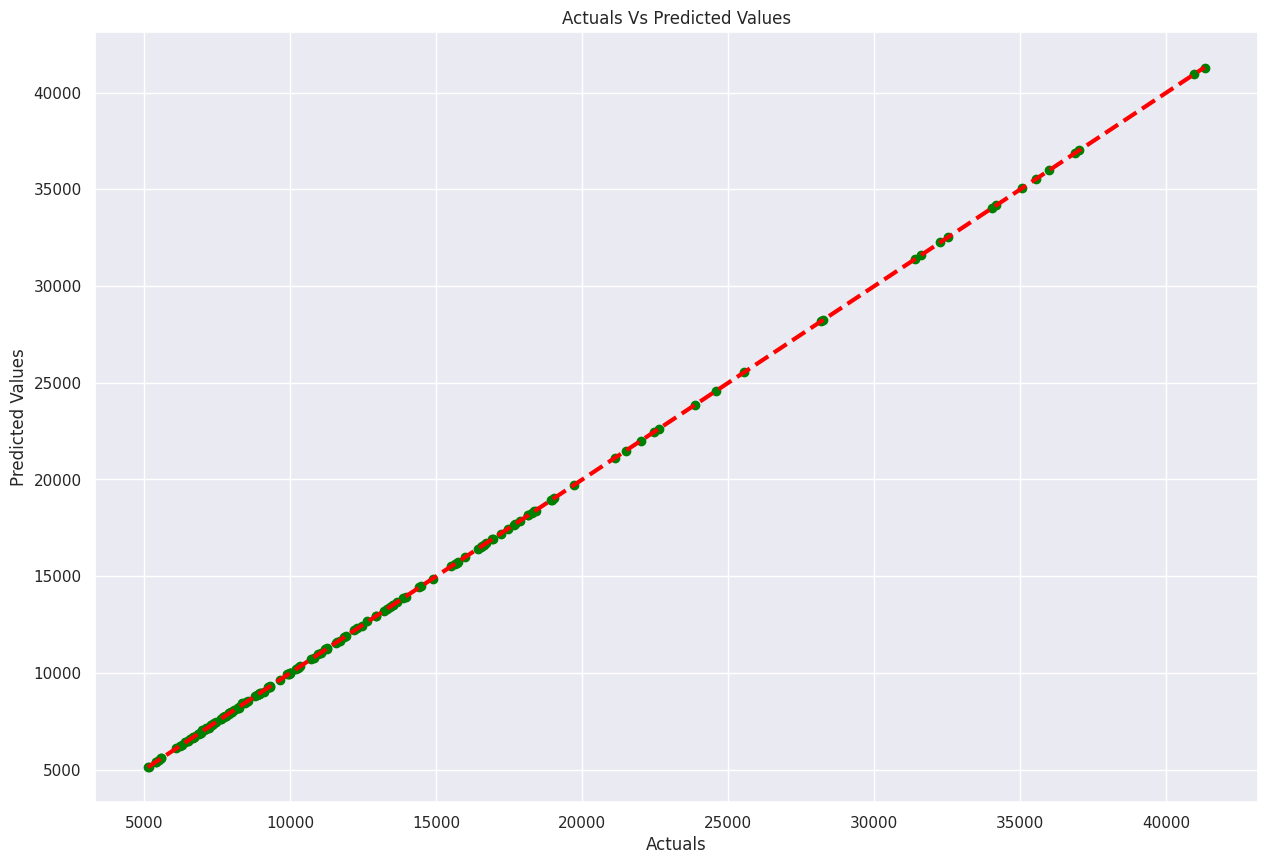

In [ ]:
# Plotting Actuals Vs Predicted

plt.figure(figsize=(15,10))

plt.scatter(y_train, y_pred, c='green')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', c='red', lw=3)
plt.xlabel('Actuals')
plt.ylabel('Predicted Values')
plt.title('Actuals Vs Predicted Values')
# increase size

In [ ]:
X_train

array([[131. ,   0. ,  96.1, ...,   0. ,   0. ,   1. ],
       [197. ,  -2. , 104.3, ...,   0. ,   0. ,   1. ],
       [157. ,   0. ,  95.7, ...,   0. ,   0. ,   1. ],
       ...,
       [137. ,   3. ,  99.1, ...,   0. ,   0. ,   1. ],
       [144. ,   0. ,  97.2, ...,   0. ,   0. ,   1. ],
       [204. ,  -1. , 109.1, ...,   0. ,   1. ,   0. ]])

In [ ]:
# Fixing the train df
final_df = pd.DataFrame(X_train, columns = X_columns.columns)
final_df['Price'] = y_train.values
final_df['Phase'] = 'Existing data'
final_df['Price Predictions'] = y_pred
print(final_df.shape)
final_df

(161, 51)


car_ID  symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0     131.0        0.0       96.1      181.5      66.5       55.2      2579.0   
1     197.0       -2.0      104.3      188.8      67.2       56.2      2935.0   
2     157.0        0.0       95.7      166.3      64.4       53.0      2081.0   
3     187.0        2.0       97.3      171.7      65.5       55.7      2275.0   
4     155.0        0.0       95.7      169.7      63.6       59.1      2290.0   
..      ...        ...        ...        ...       ...        ...         ...   
156   132.0        2.0       96.1      176.8      66.6       50.5      2460.0   
157   123.0        1.0       93.7      167.3      63.8       50.8      2191.0   
158   137.0        3.0       99.1      186.6      66.5       56.1      2808.0   
159   144.0        0.0       97.2      172.0      65.4       52.5      2340.0   
160   204.0       -1.0      109.1      188.8      68.9       55.5      3217.0   

     cylindernumber  enginesize  boreratio  ...  enginetype_l  enginetype_ohc  \
0               4.0       132.0       3.46  ...           0.0             1.0   
1               4.0       141.0       3.78  ...           0.0             1.0   
2               4.0        98.0       3.19  ...           0.0             1.0   
3               4.0       109.0       3.19  ...           0.0             1.0   
4               4.0        92.0       3.05  ...           0.0             1.0   
..              ...         ...        ...  ...           ...             ...   
156             4.0       132.0       3.46  ...           0.0             1.0   
157             4.0        98.0       2.97  ...           0.0             1.0   
158             4.0       121.0       3.54  ...           0.0             0.0   
159             4.0       108.0       3.62  ...           0.0             0.0   
160             6.0       145.0       3.01  ...           0.0             1.0   

     enginetype_ohcf  enginetype_ohcv  enginetype_rotor  fueltype_diesel  \
0                0.0              0.0               0.0              0.0   
1                0.0              0.0               0.0              0.0   
2                0.0              0.0               0.0              0.0   
3                0.0              0.0               0.0              0.0   
4                0.0              0.0               0.0              0.0   
..               ...              ...               ...              ...   
156              0.0              0.0               0.0              0.0   
157              0.0              0.0               0.0              0.0   
158              0.0              0.0               0.0              0.0   
159              1.0              0.0               0.0              0.0   
160              0.0              0.0               0.0              1.0   

     fueltype_gas  Price          Phase  Price Predictions  
0             1.0   9295  Existing data        9292.775105  
1             1.0  15985  Existing data       16015.539129  
2             1.0   6938  Existing data        6910.151267  
3             1.0   8495  Existing data        8484.263953  
4             1.0   7898  Existing data        7895.237900  
..            ...    ...            ...                ...  
156           1.0   9895  Existing data        9917.277156  
157           1.0   7609  Existing data        7606.413874  
158           1.0  18150  Existing data       18154.440693  
159           1.0   9960  Existing data        9947.947866  
160           0.0  22470  Existing data       22469.636794  

[161 rows x 51 columns]

In [ ]:
final_df2 = pd.DataFrame(X_test, columns = X_columns.columns)
final_df2['Price'] = y_test.values
final_df2['Phase'] = 'New unseen data'
final_df2['Price Predictions'] = reg.predict(X_test)
print(final_df2.shape)
final_df2

(41, 51)


car_ID  symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0     53.0        1.0       93.1      159.1      64.2       54.1      1905.0   
1    180.0        3.0      102.9      183.5      67.7       52.0      3016.0   
2     16.0        0.0      103.5      189.0      66.9       55.7      3230.0   
3    177.0       -1.0      102.4      175.6      66.5       54.9      2414.0   
4     75.0        1.0      112.0      199.2      72.0       55.4      3715.0   
5     44.0        0.0       94.3      170.7      61.8       53.5      2337.0   
6     34.0        1.0       93.7      150.0      64.0       52.6      1940.0   
7    101.0        0.0       97.2      173.4      65.2       54.7      2302.0   
8    143.0        0.0       97.2      172.0      65.4       52.5      2190.0   
9     61.0        0.0       98.8      177.8      66.5       55.5      2410.0   
10   133.0        3.0       99.1      186.6      66.5       56.1      2658.0   
11   125.0        3.0       95.9      173.2      66.3       50.2      2818.0   
12   120.0        1.0       93.7      157.3      63.8       50.8      2128.0   
13   151.0        1.0       95.7      158.7      63.6       54.5      1985.0   
14    62.0        1.0       98.8      177.8      66.5       53.7      2385.0   
15    30.0        3.0       95.9      173.2      66.3       50.2      2811.0   
16    13.0        0.0      101.2      176.8      64.8       54.3      2710.0   
17    82.0        3.0       96.3      173.0      65.4       49.4      2328.0   
18   115.0        0.0      114.2      198.9      68.4       58.7      3485.0   
19   138.0        2.0       99.1      186.6      66.5       56.1      2847.0   
20    78.0        2.0       93.7      157.3      64.4       50.8      1944.0   
21    40.0        0.0       96.5      175.4      65.2       54.1      2304.0   
22    97.0        1.0       94.5      165.3      63.8       54.5      1971.0   
23   178.0       -1.0      102.4      175.6      66.5       53.9      2458.0   
24   170.0        2.0       98.4      176.2      65.6       52.0      2551.0   
25   167.0        1.0       94.5      168.7      64.0       52.6      2300.0   
26   152.0        1.0       95.7      158.7      63.6       54.5      2040.0   
27   199.0       -2.0      104.3      188.8      67.2       56.2      3045.0   
28   201.0       -1.0      109.1      188.8      68.9       55.5      2952.0   
29    25.0        1.0       93.7      157.3      63.8       50.6      1967.0   
30   112.0        0.0      107.9      186.7      68.4       56.7      3075.0   
31   193.0        0.0      100.4      180.2      66.9       55.1      2579.0   
32   141.0        2.0       93.3      157.3      63.8       55.7      2240.0   
33    76.0        1.0      102.7      178.4      68.0       54.8      2910.0   
34   135.0        3.0       99.1      186.6      66.5       56.1      2707.0   
35     6.0        2.0       99.8      177.3      66.3       53.1      2507.0   
36   188.0        2.0       97.3      171.7      65.5       55.7      2319.0   
37   117.0        0.0      107.9      186.7      68.4       56.7      3252.0   
38    98.0        1.0       94.5      170.2      63.8       53.5      2037.0   
39   149.0        0.0       96.9      173.6      65.4       54.9      2420.0   
40    51.0        1.0       93.1      159.1      64.2       54.1      1890.0   

    cylindernumber  enginesize  boreratio  ...  enginetype_l  enginetype_ohc  \
0              4.0        91.0       3.03  ...           0.0             1.0   
1              6.0       171.0       3.27  ...           0.0             0.0   
2              6.0       209.0       3.62  ...           0.0             1.0   
3              4.0       122.0       3.31  ...           0.0             1.0   
4              8.0       304.0       3.80  ...           0.0             0.0   
5              4.0       111.0       3.31  ...           0.0             1.0   
6              4.0        92.0       2.91  ...           0.0             1.0   
7  

In [ ]:
# unioning them
final_df3 = pd.concat([final_df, final_df2], ignore_index = True)
print(final_df3.shape)
final_df3.head()

(202, 51)


car_ID  symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0   131.0        0.0       96.1      181.5      66.5       55.2      2579.0   
1   197.0       -2.0      104.3      188.8      67.2       56.2      2935.0   
2   157.0        0.0       95.7      166.3      64.4       53.0      2081.0   
3   187.0        2.0       97.3      171.7      65.5       55.7      2275.0   
4   155.0        0.0       95.7      169.7      63.6       59.1      2290.0   

   cylindernumber  enginesize  boreratio  ...  enginetype_l  enginetype_ohc  \
0             4.0       132.0       3.46  ...           0.0             1.0   
1             4.0       141.0       3.78  ...           0.0             1.0   
2             4.0        98.0       3.19  ...           0.0             1.0   
3             4.0       109.0       3.19  ...           0.0             1.0   
4             4.0        92.0       3.05  ...           0.0             1.0   

   enginetype_ohcf  enginetype_ohcv  enginetype_rotor  fueltype_diesel  \
0              0.0              0.0               0.0              0.0   
1              0.0              0.0               0.0              0.0   
2              0.0              0.0               0.0              0.0   
3              0.0              0.0               0.0              0.0   
4              0.0              0.0               0.0              0.0   

   fueltype_gas  Price          Phase  Price Predictions  
0           1.0   9295  Existing data        9292.775105  
1           1.0  15985  Existing data       16015.539129  
2           1.0   6938  Existing data        6910.151267  
3           1.0   8495  Existing data        8484.263953  
4           1.0   7898  Existing data        7895.237900  

[5 rows x 51 columns]

In [ ]:
# Left Joining to the original dataset the predictions
raw_data['car_ID'] = raw_data['car_ID'].astype(int)
final_df3['car_ID'] = final_df3['car_ID'].astype(int)

In [ ]:
final_df4 = raw_data.merge(final_df3[['car_ID','Phase','Price Predictions']], how = 'left', on = 'car_ID')
final_df4['CarName'] = final_df4['CarName'] + ' - ' + final_df4['car_ID'].astype(str)
print(final_df4.shape)
final_df4.head()

(202, 29)


car_ID  symboling          CarName fueltype aspiration doornumber carbody  \
0       4          2  audi 100 ls - 4      gas        std       four   sedan   
1       5          2   audi 100ls - 5      gas        std       four   sedan   
2       6          2     audi fox - 6      gas        std        two   sedan   
3       7          1   audi 100ls - 7      gas        std       four   sedan   
4       8          1    audi 5000 - 8      gas        std       four   wagon   

  drivewheel enginelocation  wheelbase  ...  stroke  compressionratio  \
0        fwd          front       99.8  ...     3.4              10.0   
1        4wd          front       99.4  ...     3.4               8.0   
2        fwd          front       99.8  ...     3.4               8.5   
3        fwd          front      105.8  ...     3.4               8.5   
4        fwd          front      105.8  ...     3.4               8.5   

   horsepower  peakrpm citympg highwaympg    price  price 2            Phase  \
0         102     5500      24         30  13950.0  13950.0    Existing data   
1         115     5500      18         22  17450.0  17450.0    Existing data   
2         110     5500      19         25  15250.0  15250.0  New unseen data   
3         110     5500      19         25  17710.0  17710.0    Existing data   
4         110     5500      19         25  18920.0  18920.0    Existing data   

   Price Predictions  
0       13930.822620  
1       17459.969485  
2       15520.528837  
3       17708.725626  
4       18929.469448  

[5 rows x 29 columns]

In [ ]:
# 9.5. Exporting the data in a CSV
final_df4.to_csv('Car Predictions Output', sep='\t')



In [ ]:
# Exporting the data to an Excel file
#pip install openpyxl

final_df4.to_excel('Car_Predictions_Output.xlsx', index=False)
